<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# Simple Linear Regression


Estimated time needed: **15** minutes
    

## Objectives

After completing this lab you will be able to:

* Use scikit-learn to implement simple Linear Regression
* Create a model, train it, test it and use the model

### Importing Needed packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from io import StringIO
import requests
%matplotlib widget

In [4]:
path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [5]:
df = pd.read_csv(StringIO(requests.get(path).text))
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
print(df.describe().round(2).to_string())

       MODELYEAR  ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS
count     1067.0     1067.00    1067.00               1067.00              1067.00               1067.00                   1067.00       1067.00
mean      2014.0        3.35       5.79                 13.30                 9.47                 11.58                     26.44        256.23
std          0.0        1.42       1.80                  4.10                 2.79                  3.49                      7.47         63.37
min       2014.0        1.00       3.00                  4.60                 4.90                  4.70                     11.00        108.00
25%       2014.0        2.00       4.00                 10.25                 7.50                  9.00                     21.00        207.00
50%       2014.0        3.40       6.00                 12.60                 8.80                 10.90                     26.00

In [7]:
for col in df.columns.values.tolist():
    print(df[col].value_counts(), "\n")

MODELYEAR
2014    1067
Name: count, dtype: int64 

MAKE
FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
GMC              49
AUDI             49
TOYOTA           49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
NISSAN           33
KIA              33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
JAGUAR           22
LEXUS            22
HONDA            21
INFINITI         21
CHRYSLER         19
LAND ROVER       19
MITSUBISHI       16
BUICK            16
RAM              13
ACURA            12
VOLVO            11
LINCOLN          11
FIAT             10
SCION             9
BENTLEY           8
ROLLS-ROYCE       7
ASTON MARTIN      7
MASERATI          6
LAMBORGHINI       3
SMART             2
SRT               2
Name: count, dtype: int64 

MODEL
F150 FFV                 8
F150 FFV 4X4             8
ACCORD                   6
FOCUS FFV                6
BEETLE                

Let's select some features to explore more.

In [8]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


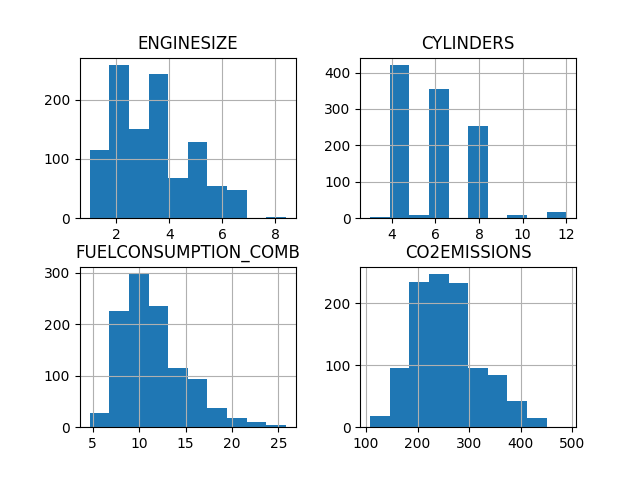

In [9]:
viz = cdf
viz.hist()
plt.show()

Now let's plot each of these features to the emission, to see how linear thier relationship is:

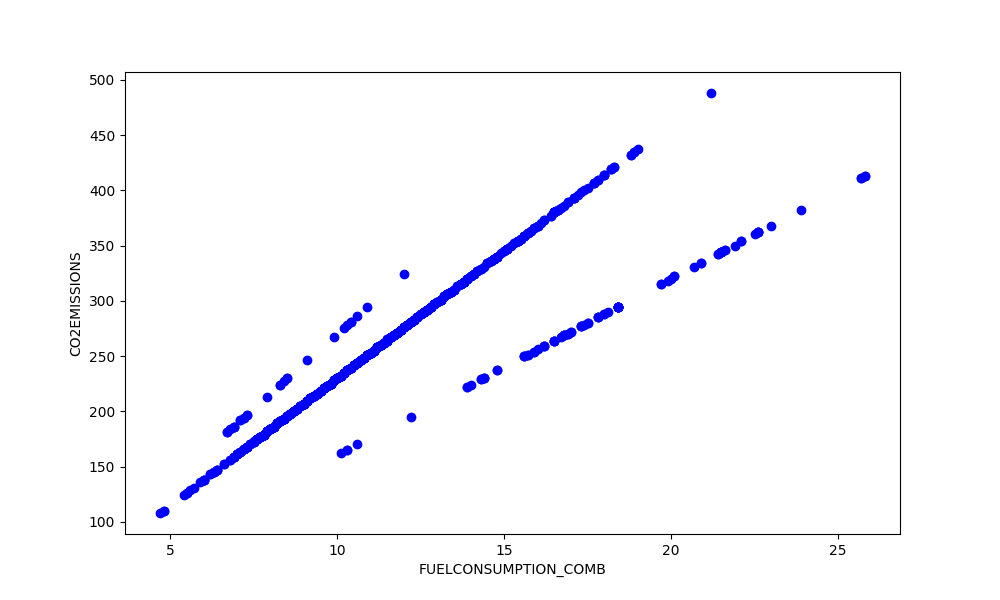

In [10]:
plt.figure(figsize = (10, 6))
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

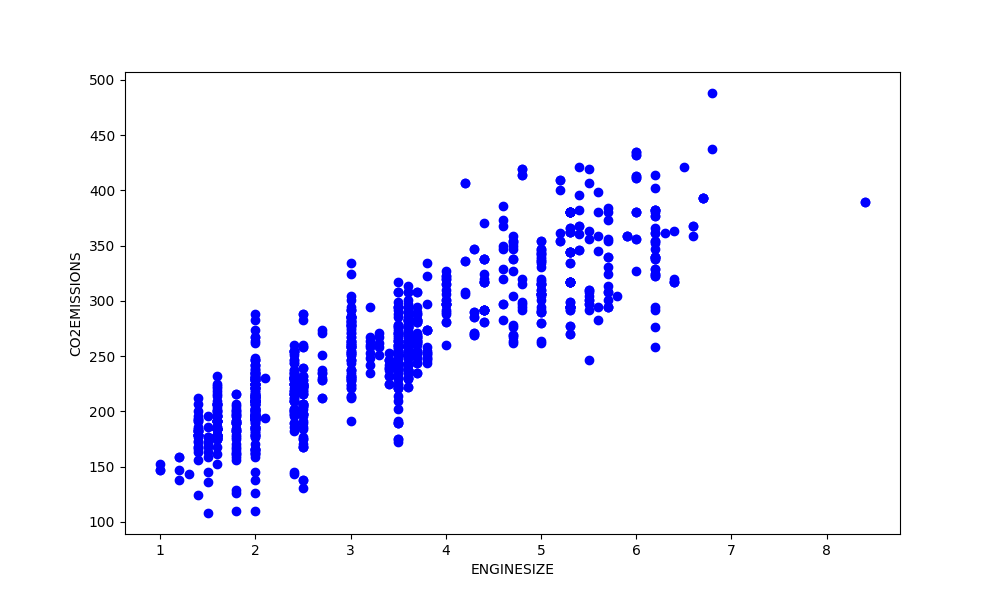

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

Text(0, 0.5, 'CO2EMISSIONS')

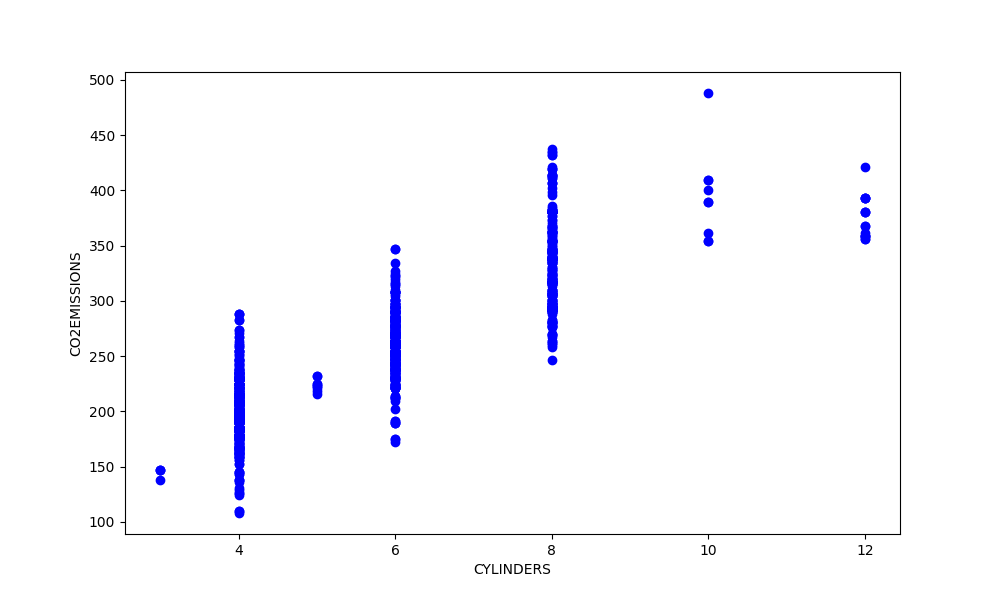

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive.</p>After which, you train with the training set and test with the testing set.</p>This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model.</p>Therefore, it gives us a better understanding of how well our model generalizes on new data.</p>This means that we know the outcome of each data point in the testing dataset, making it great to test with!</p>Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.</p>Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 

In [13]:
msk = np.random.rand(len(df)) < 0.8
print('msk: ', msk[:10])
print('\nmsk False: ', sum(x == False for x in msk))
print('\nmsk True: ', sum(x == True for x in msk))

train = cdf[msk]
print('\ntrain\n', train.head(10))

test = cdf[~msk]
print('test\n', test.head(10))

msk:  [ True  True  True  True  True  True  True  True  True  True]

msk False:  217

msk True:  850

train
    ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0         2.0          4                   8.5           196
1         2.4          4                   9.6           221
2         1.5          4                   5.9           136
3         3.5          6                  11.1           255
4         3.5          6                  10.6           244
5         3.5          6                  10.0           230
6         3.5          6                  10.1           232
7         3.7          6                  11.1           255
8         3.7          6                  11.6           267
9         2.4          4                   9.2           212
test
     ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
12         5.9         12                  15.6           359
30         3.0          6                  11.2           258
35         6.3         12   

### Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.

#### Train data distribution

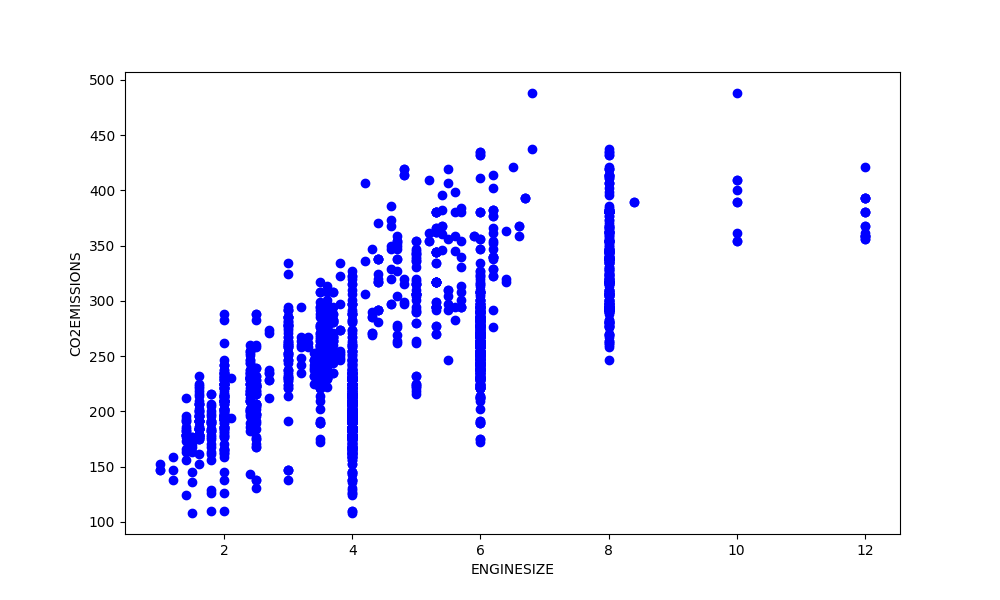

In [14]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

#### Modeling
Using sklearn package to model data.

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

# the coefficients
print('Corfficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)




Corfficients:  [[39.6499248]]
Intercept:  [123.48534571]


As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line.</p>Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data.</p>Notice that all of the data must be available to traverse and calculate the parameters.

#### Plot outputs

We can plot the fit line over the data:

Text(0, 0.5, 'CO2EMISSIONS')

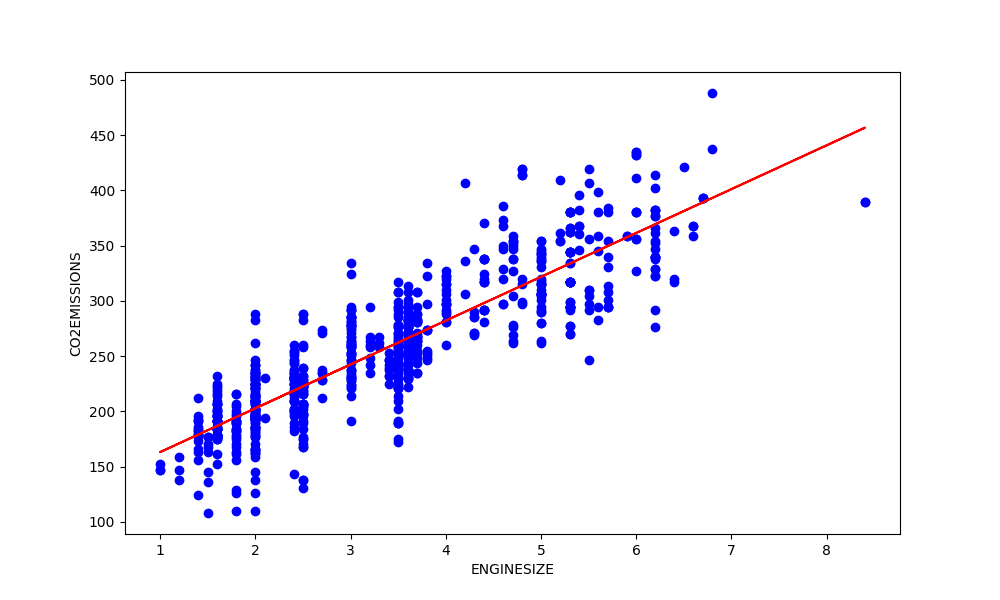

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")

#### Evaluation
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

* Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

* Root Mean Squared Error (RMSE). 

* R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [17]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

Mean absolute error: 23.79
Residual sum of squares (MSE): 992.32
R2-score: 0.76


Ecercise:
Lets see what the evaluation metrics are if we trained a regression model using the `FUELCONSUMPTION_COMB` feature.

Start by selecting `FUELCONSUMPTION_COMB` as the train_x data from the `train` dataframe, then select `FUELCONSUMPTION_COMB` as the test_x data from the `test` dataframe

Corfficients:  [[16.12352204]]
Intercept:  [69.10335061]


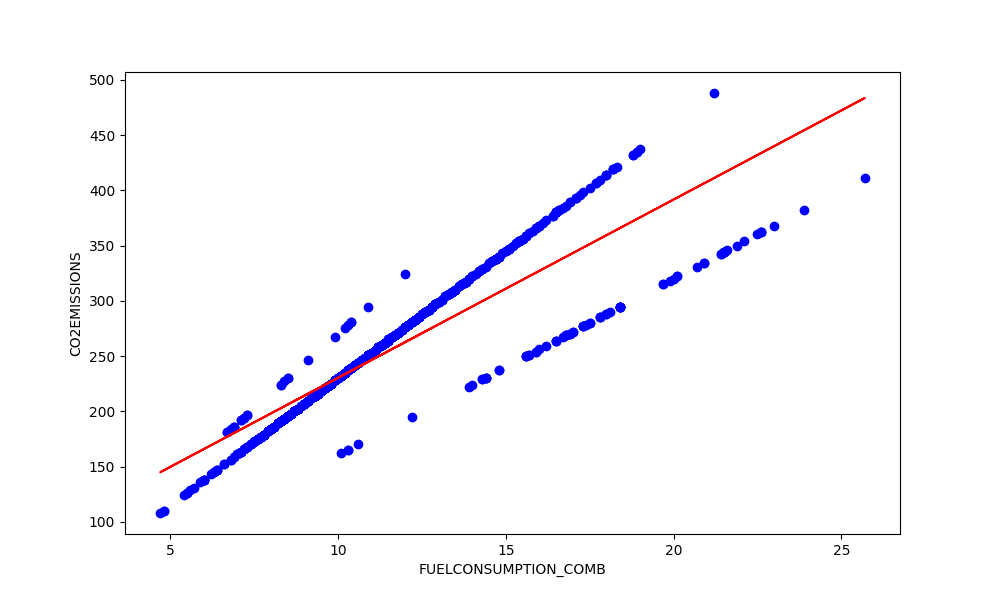

Mean absolute error: 18.91
Residual sum of squares (MSE): 672.16
R2-score: 0.83


In [18]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

# the coefficients
print('Corfficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)


plt.figure(figsize=(10, 6))
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()


test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# Multiple Linear Regression


Estimated time needed: **15** minutes
    

## Objectives

After completing this lab you will be able to:

* Use scikit-learn to implement Multiple Linear Regression
* Create a model, train it, test it and use the model

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
import requests
from io import StringIO
%matplotlib inline
%matplotlib widget

In [20]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [21]:
df = pd.read_csv(StringIO(requests.get(url).text))
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


Let's select some features that we want to use for regression.

In [22]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


Let's plot the values with respect to Engine size:

In [23]:
cdf.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,1.000000


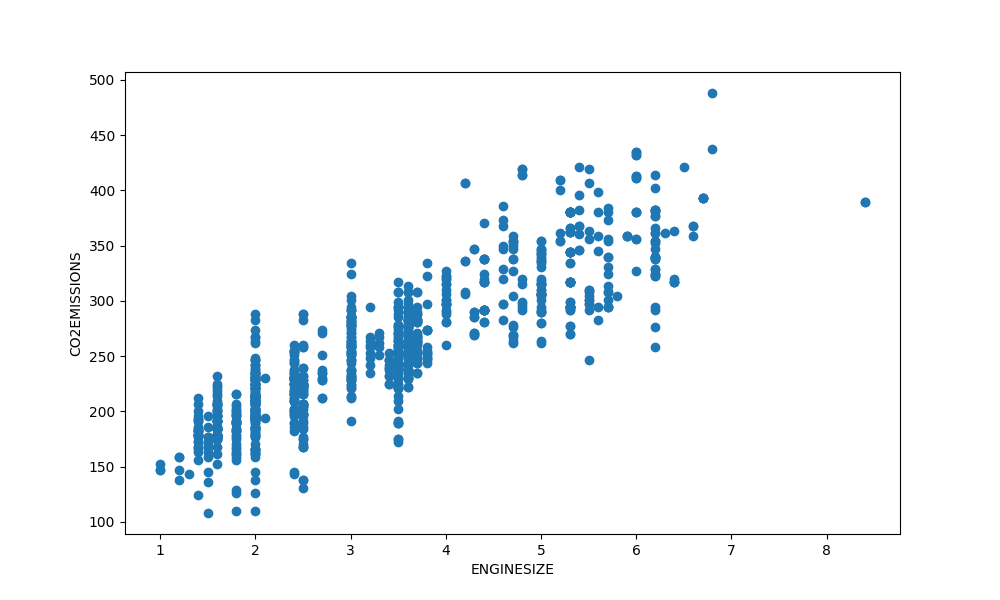

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS)
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

We know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. Around 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using the  __np.random.rand()__ function: 

In [25]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Train data distribution

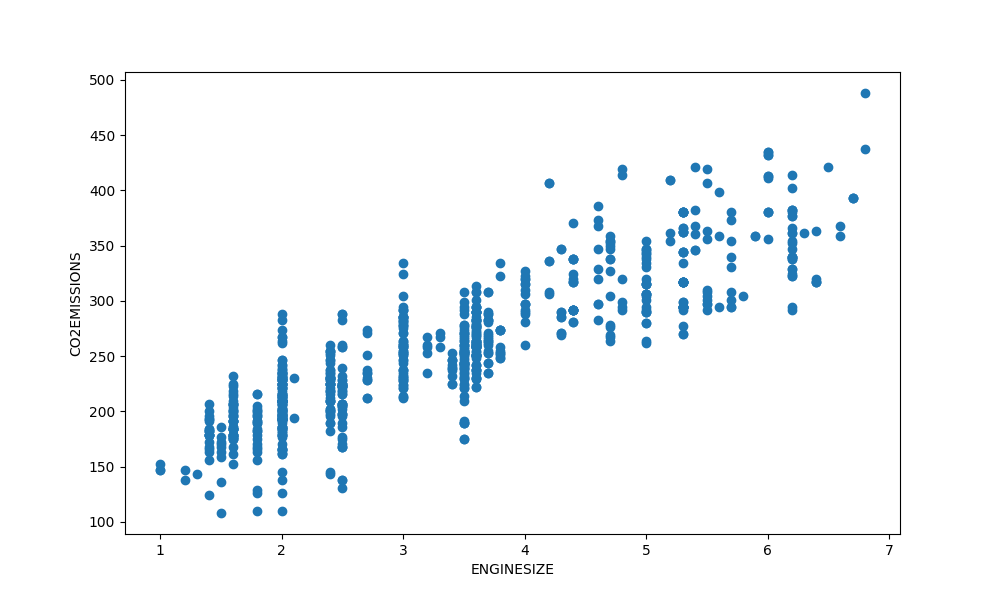

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS)
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

<h2 id="multiple_regression_model">Multiple Regression Model</h2>

In reality, there are multiple variables that impact the co2emission. When more than one independent variable is present, the process is called multiple linear regression. An example of multiple linear regression is predicting co2emission using the features FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that multiple linear regression model is the extension of the simple linear regression model.

In [27]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
print('created x:\n', x)

y = np.asanyarray(train[['CO2EMISSIONS']])
print('created y:\n', y)

regr.fit(x, y)

# The coefficients
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

created x:
 [[ 2.   4.   8.5]
 [ 2.4  4.   9.6]
 [ 1.5  4.   5.9]
 ...
 [ 3.   6.  11.8]
 [ 3.   6.  11.8]
 [ 3.2  6.  11.3]]
created y:
 [[196]
 [221]
 [136]
 [255]
 [244]
 [230]
 [232]
 [255]
 [267]
 [225]
 [239]
 [359]
 [338]
 [354]
 [338]
 [354]
 [359]
 [202]
 [230]
 [214]
 [230]
 [230]
 [235]
 [251]
 [224]
 [258]
 [224]
 [260]
 [227]
 [258]
 [288]
 [361]
 [230]
 [242]
 [239]
 [258]
 [212]
 [246]
 [304]
 [294]
 [336]
 [407]
 [354]
 [409]
 [336]
 [407]
 [409]
 [306]
 [308]
 [290]
 [262]
 [285]
 [285]
 [281]
 [292]
 [209]
 [209]
 [237]
 [237]
 [320]
 [380]
 [380]
 [380]
 [437]
 [193]
 [200]
 [181]
 [181]
 [193]
 [200]
 [209]
 [209]
 [209]
 [221]
 [228]
 [237]
 [232]
 [193]
 [200]
 [209]
 [221]
 [230]
 [228]
 [237]
 [202]
 [209]
 [213]
 [232]
 [246]
 [281]
 [292]
 [292]
 [281]
 [292]
 [292]
 [292]
 [356]
 [214]
 [212]
 [292]
 [292]
 [338]
 [338]
 [317]
 [338]
 [317]
 [338]
 [317]
 [209]
 [260]
 [230]
 [253]
 [255]
 [320]
 [370]
 [324]
 [209]
 [200]
 [278]
 [253]
 [278]
 [283]
 [290]
 

As mentioned before, __Coefficient__ and __Intercept__  are the parameters of the fitted line. 
Given that it is a multiple linear regression model with 3 parameters and that the parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:
* Solving the model parameters analytically using closed-form equations
* Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

<h2 id="prediction">Prediction</h2>

In [28]:
y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print('Mean Squared Error (MSE): %.2f' % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Mean Squared Error (MSE): 431.13
Variance score: 0.89


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


__Explained variance regression score:__  
Let $\hat{y}$ be the estimated target output, y the corresponding (correct) target output, and Var be the Variance (the square of the standard deviation). Then the explained variance is estimated as follows:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, the lower values are worse.

In [29]:
df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']].corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [30]:
# trying to train a MLR model using all non-categorical features
new_df = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']]

msk = np.random.rand(len(new_df)) < 0.8
train = new_df[msk]
test = new_df[~msk]

regr = linear_model.LinearRegression()
x = np.asanyarray(new_df.drop(columns=['CO2EMISSIONS']))
y = np.asanyarray(new_df[['CO2EMISSIONS']])
regr.fit(x, y)

print('Coeficients: ', regr.coef_, regr.intercept_)

y_hat = regr.predict(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']])
x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print('Residual sum of squares MSE: %.2f' % np.mean((y_hat - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))


Coeficients:  [[  8.57767262   7.698747   -10.59262337  -3.48918281  17.75286099
   -3.86924281]] [253.53120115]
Residual sum of squares MSE: 447.03
Variance score: 0.88


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

# K-Nearest Neighbors

Estimated time needed: **25** minutes

## Objectives

After completing this lab you will be able to:

*   Use K Nearest neighbors to classify data

In this Lab you will load a customer dataset, fit the data, and use K-Nearest Neighbors to predict a data point. But what is **K-Nearest Neighbors**?

**K-Nearest Neighbors** is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.

### Here's an visualization of the K-Nearest Neighbors algorithm.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/KNN_Diagram.png">

In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points), we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.

In this sense, it is important to consider the value of k. Hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (data points) when it predicts the classification of the test point.


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from io import StringIO
import requests
%matplotlib inline

<div id="about_dataset">
    <h2>About the dataset</h2>
</div>

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called **custcat**, has four possible values that correspond to the four customer groups, as follows:
1- Basic Service
2- E-Service
3- Plus Service
4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.


In [32]:
df = pd.read_csv(StringIO(requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv').text))
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


<div id="visualization_analysis">
    <h2>Data Visualization and Analysis</h2> 
</div>

#### Let’s see how many of each class is in our data set

In [33]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

281 Plus Service</p>266 Basic-service</p>236 Total Service</p>217 E-Service customers

You can easily explore your data using visualization techniques:

array([[<Axes: title={'center': 'income'}>]], dtype=object)

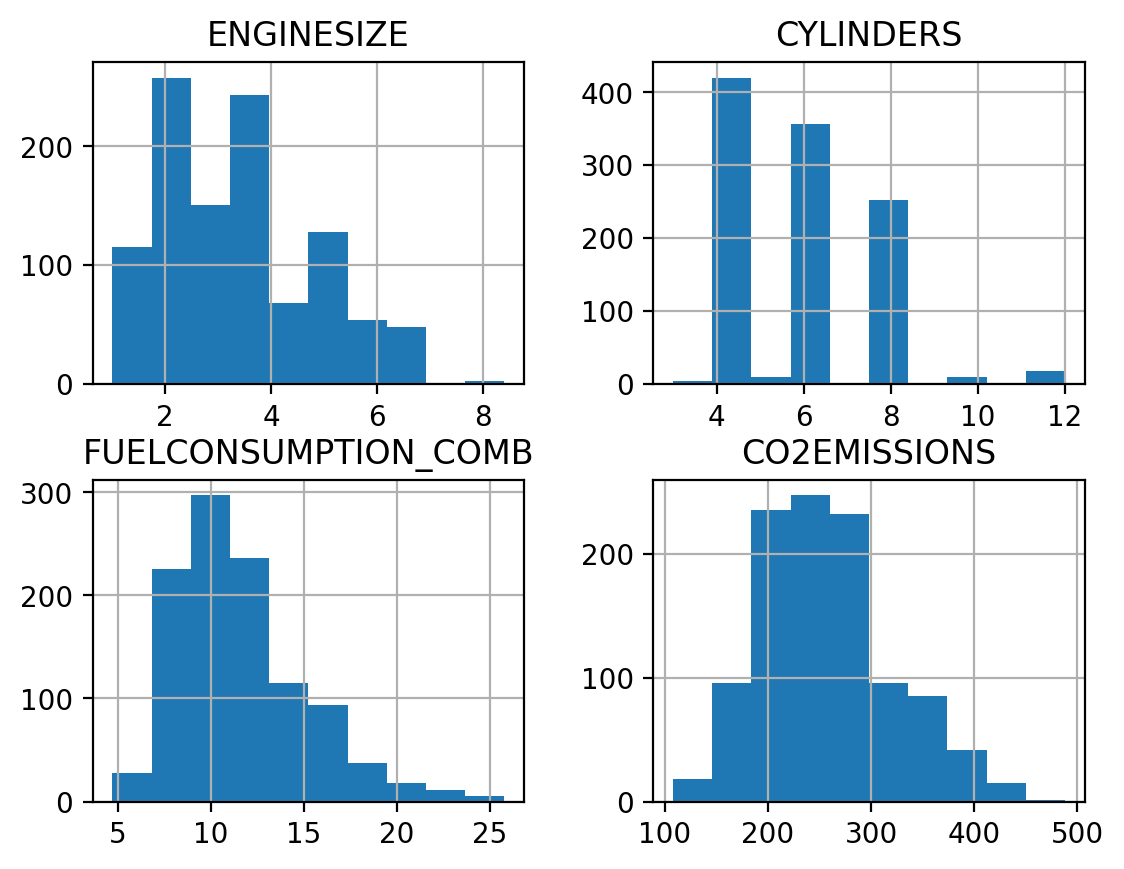

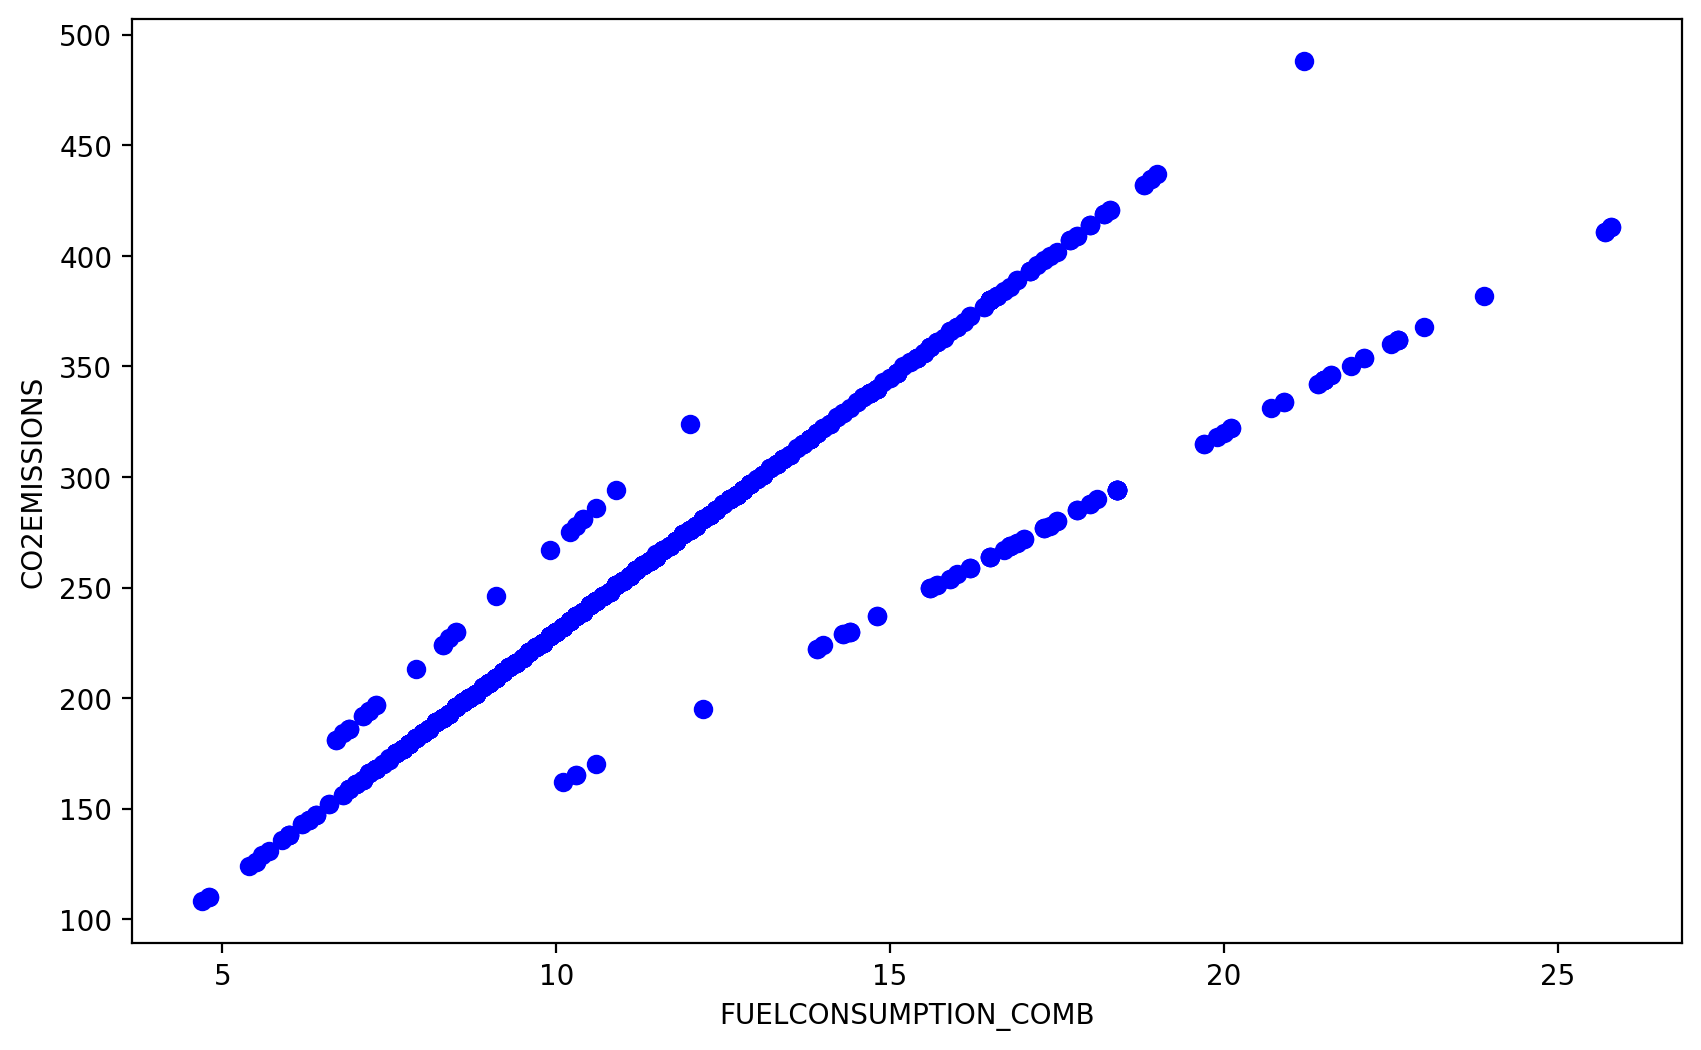

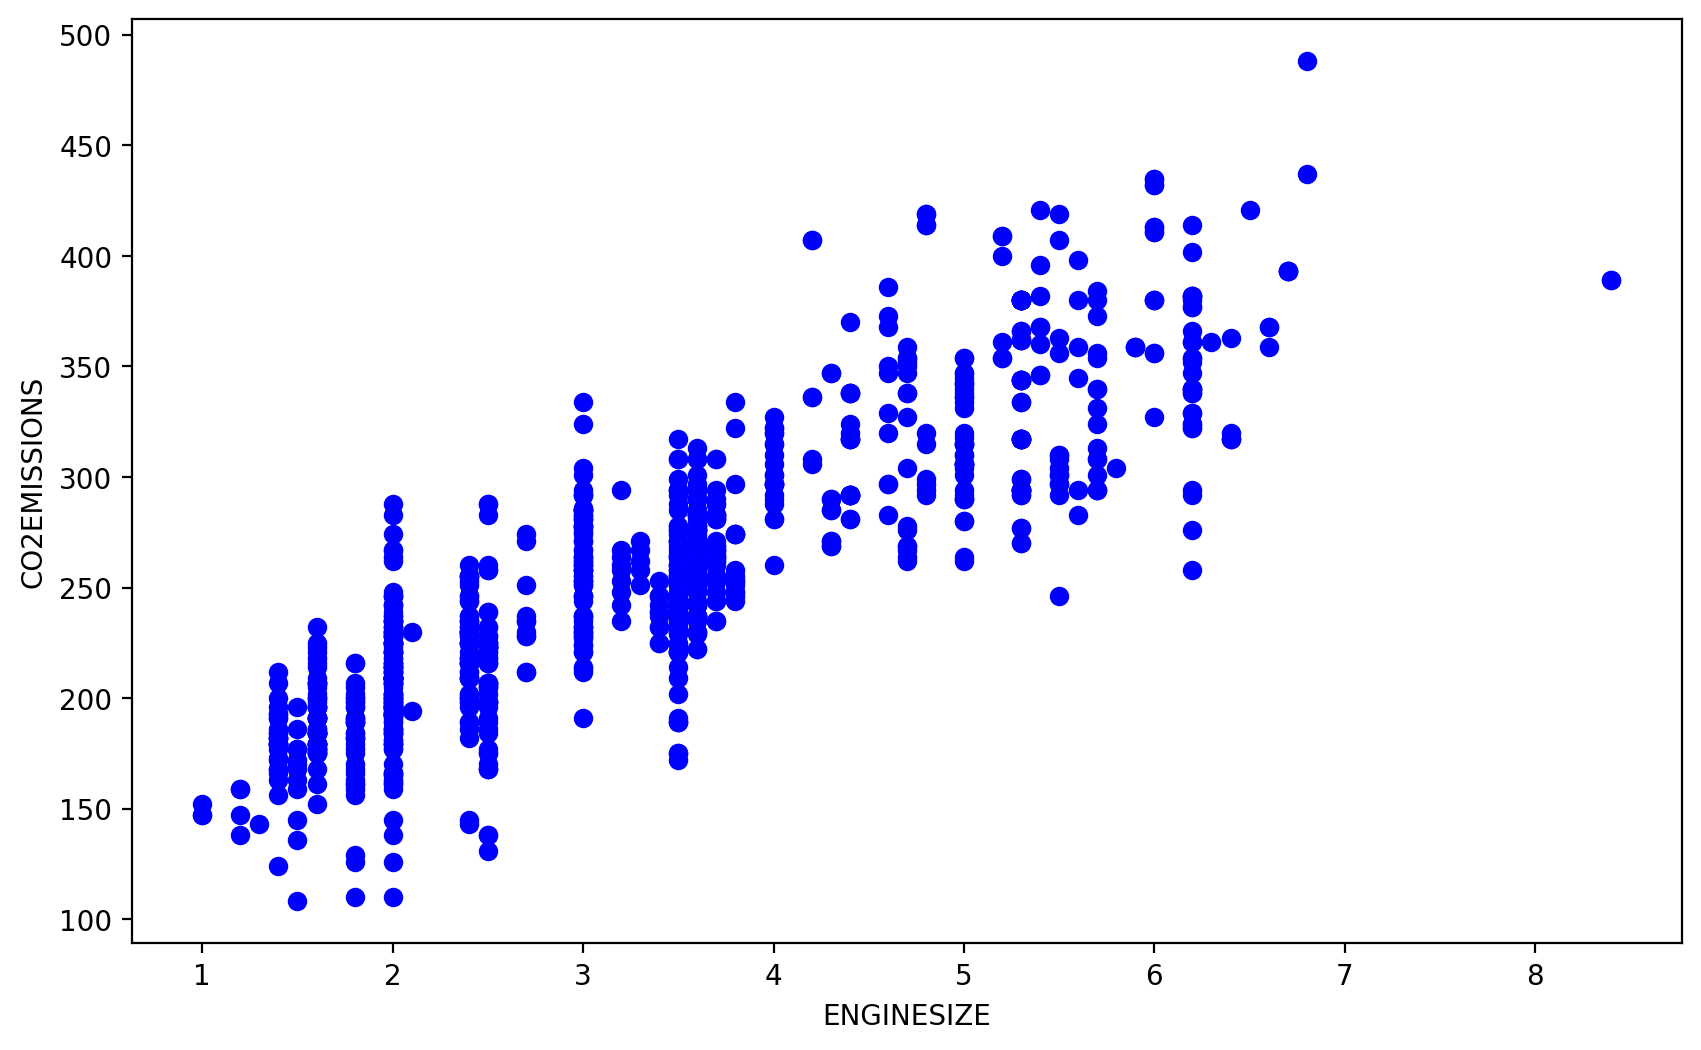

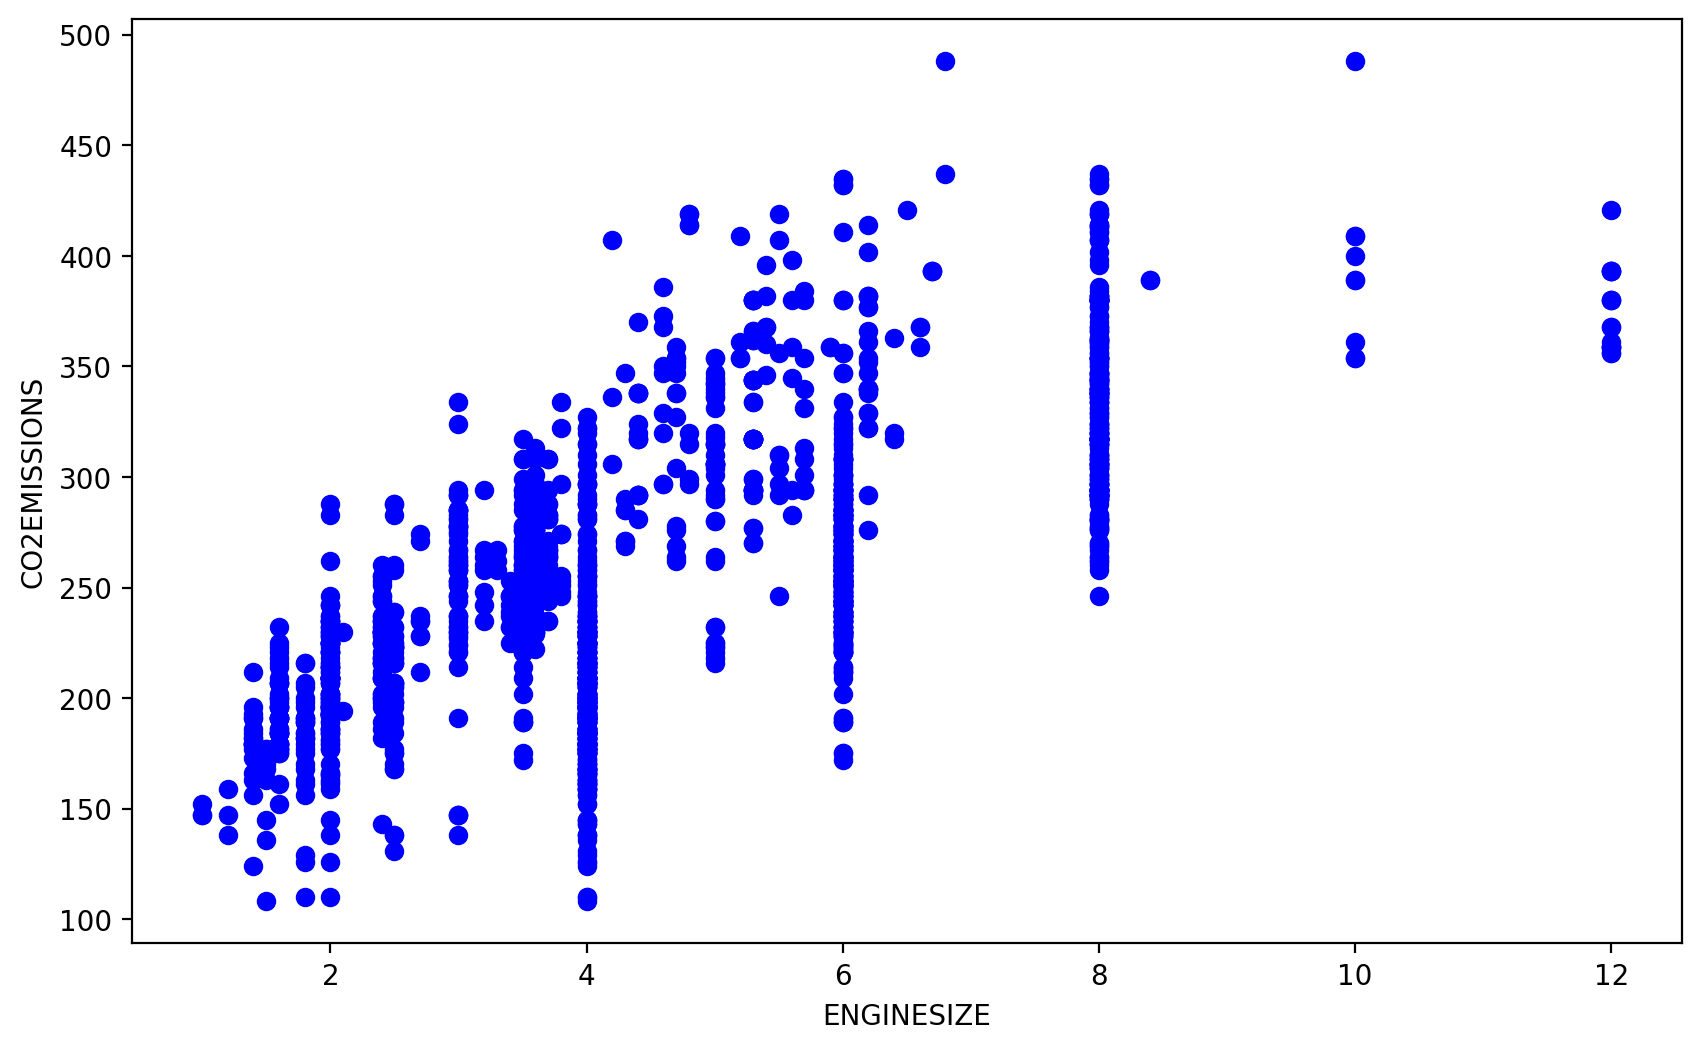

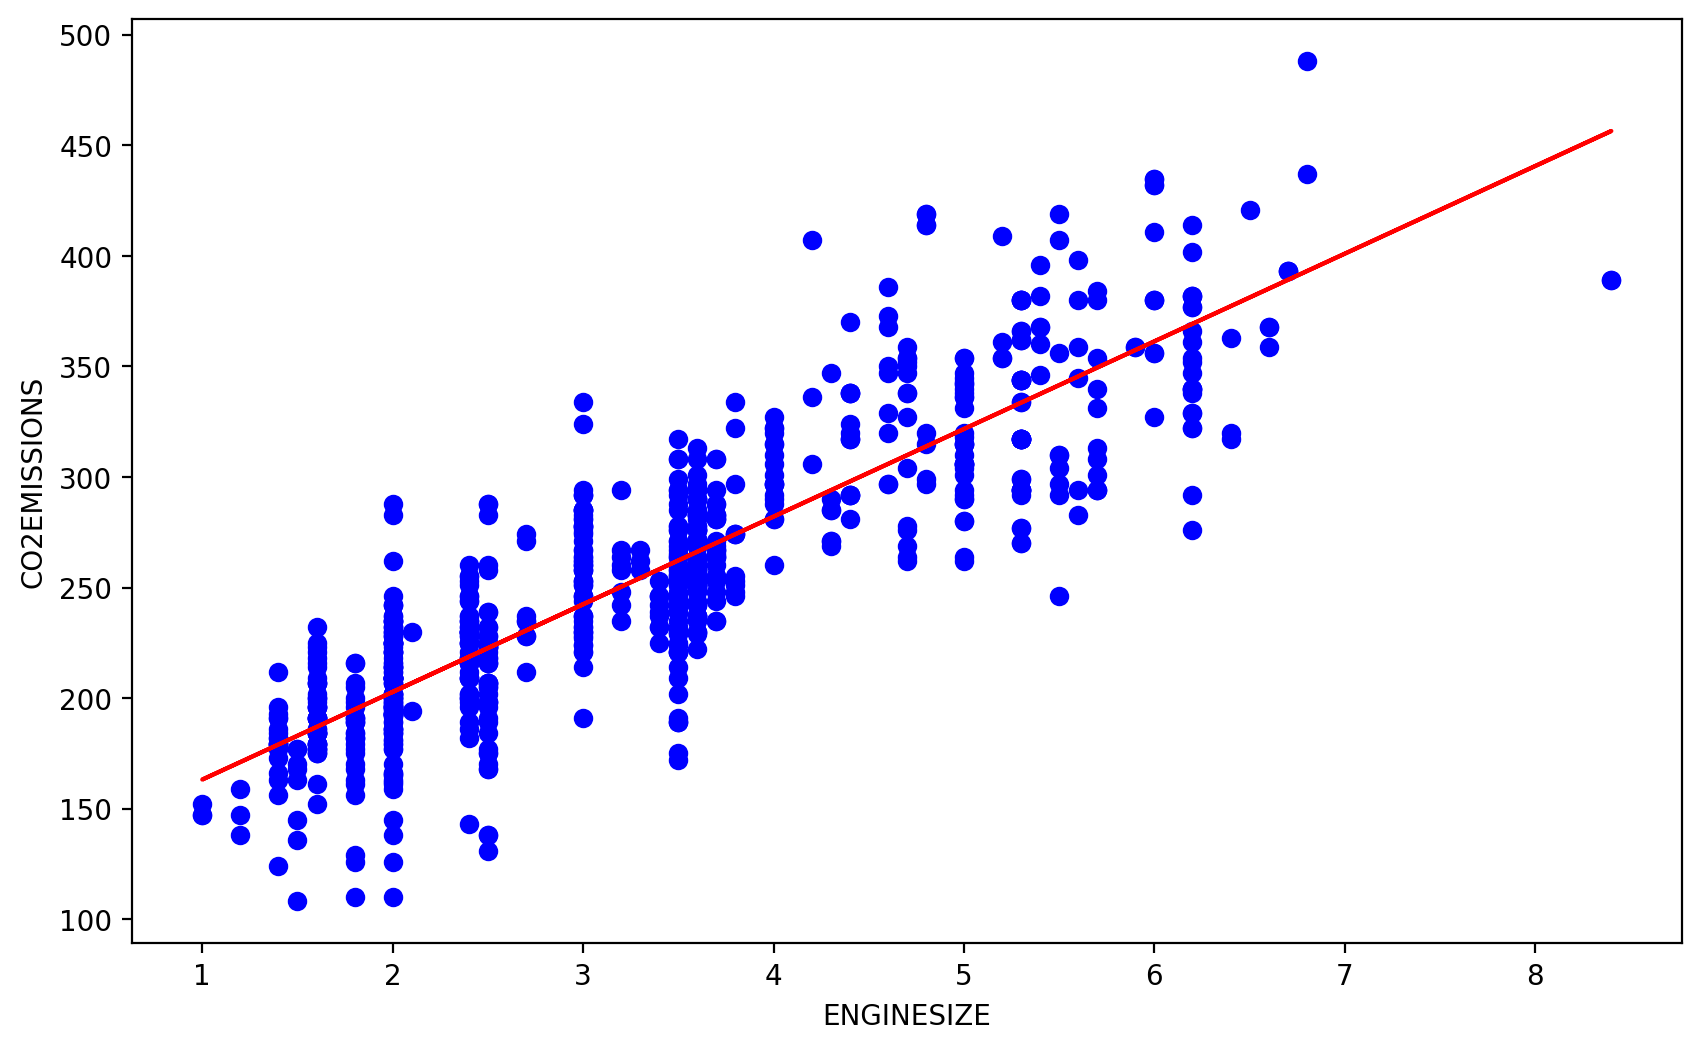

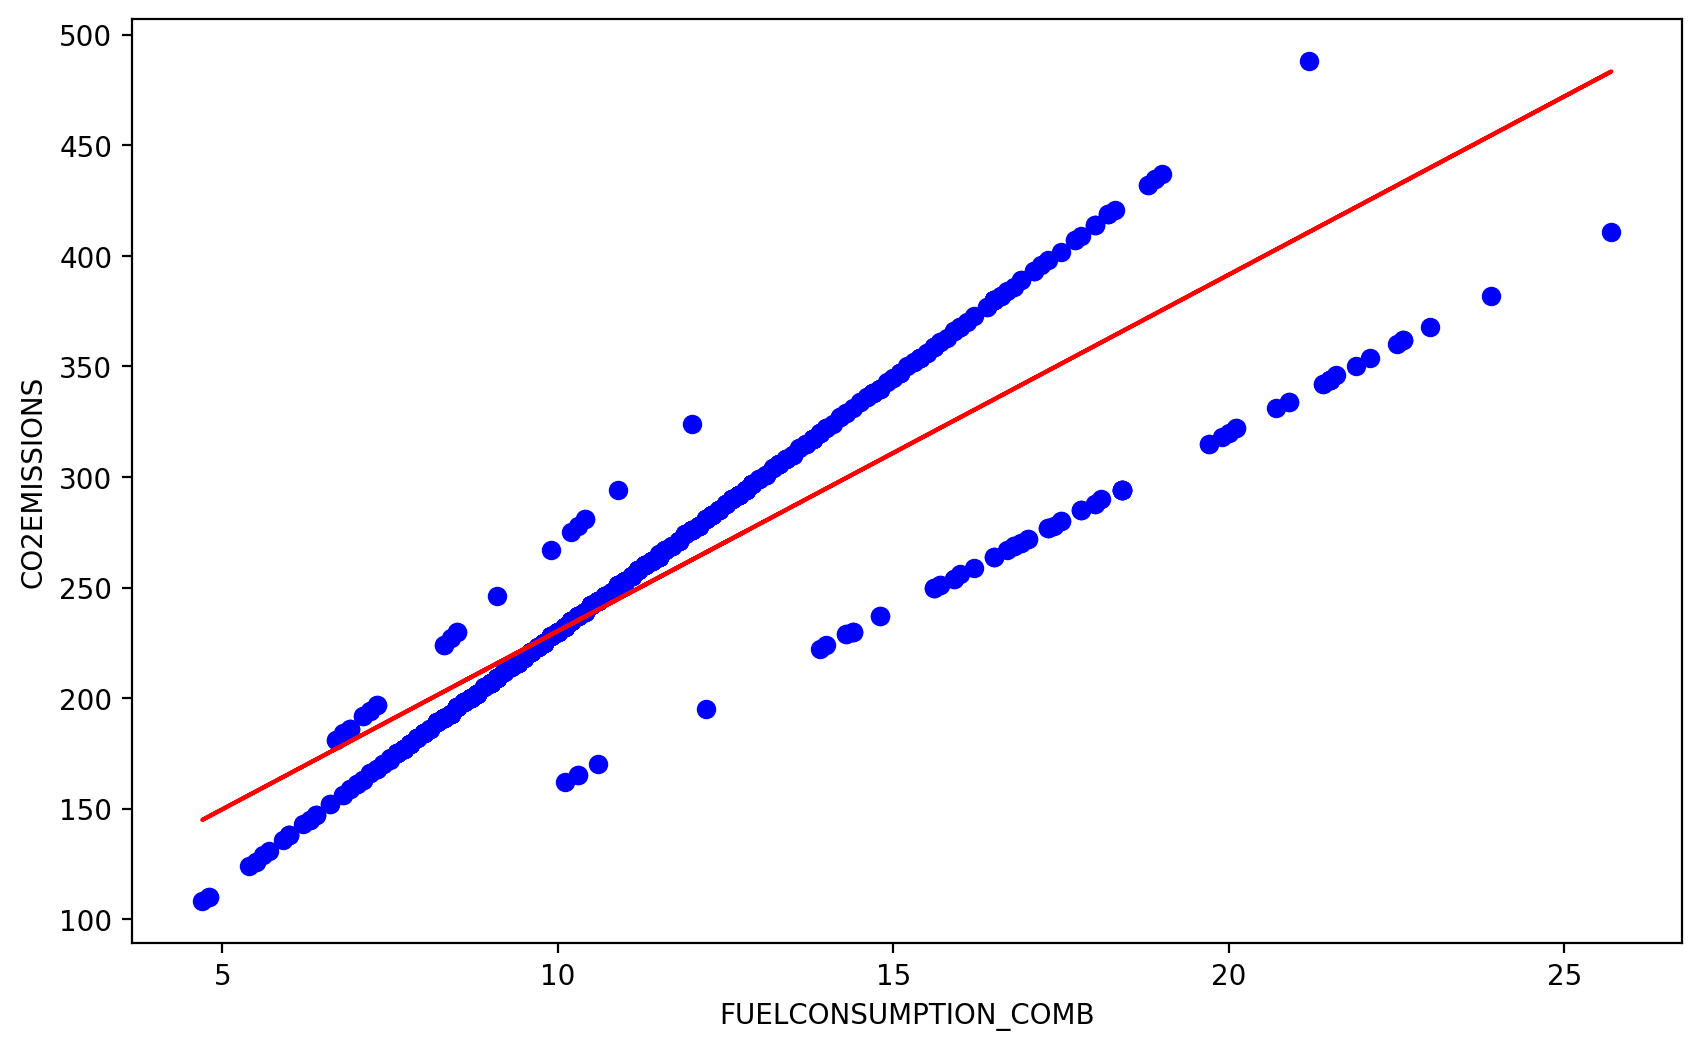

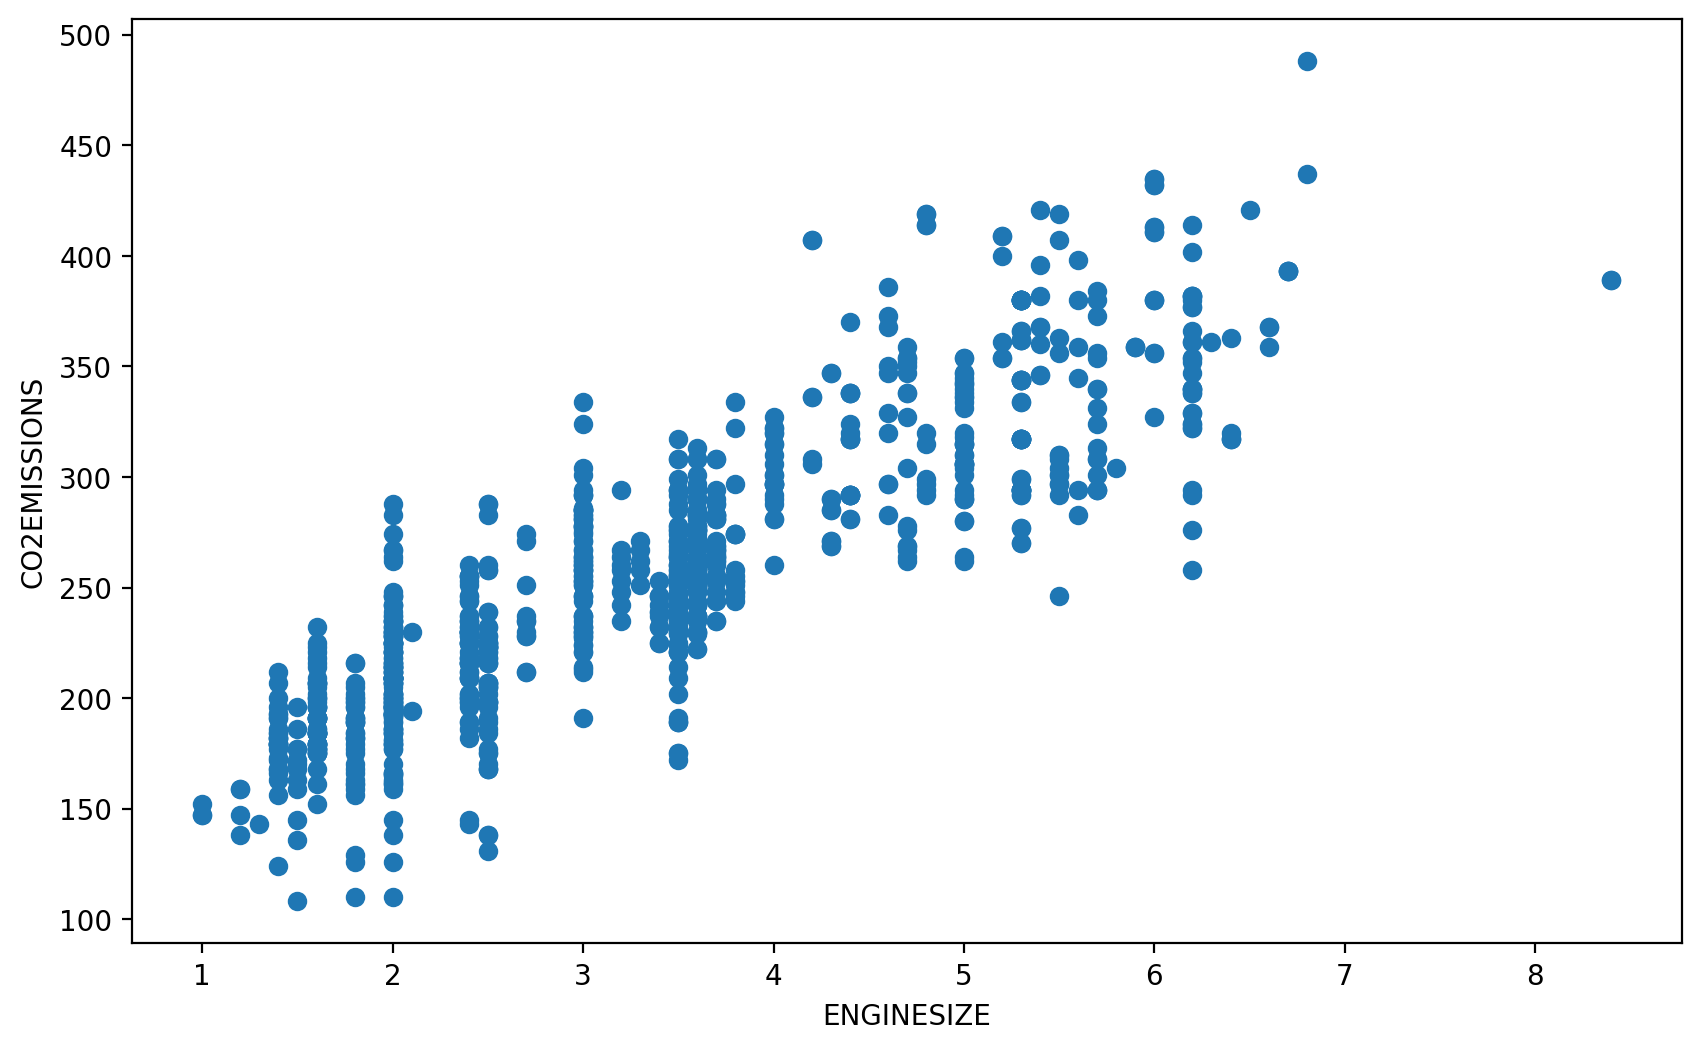

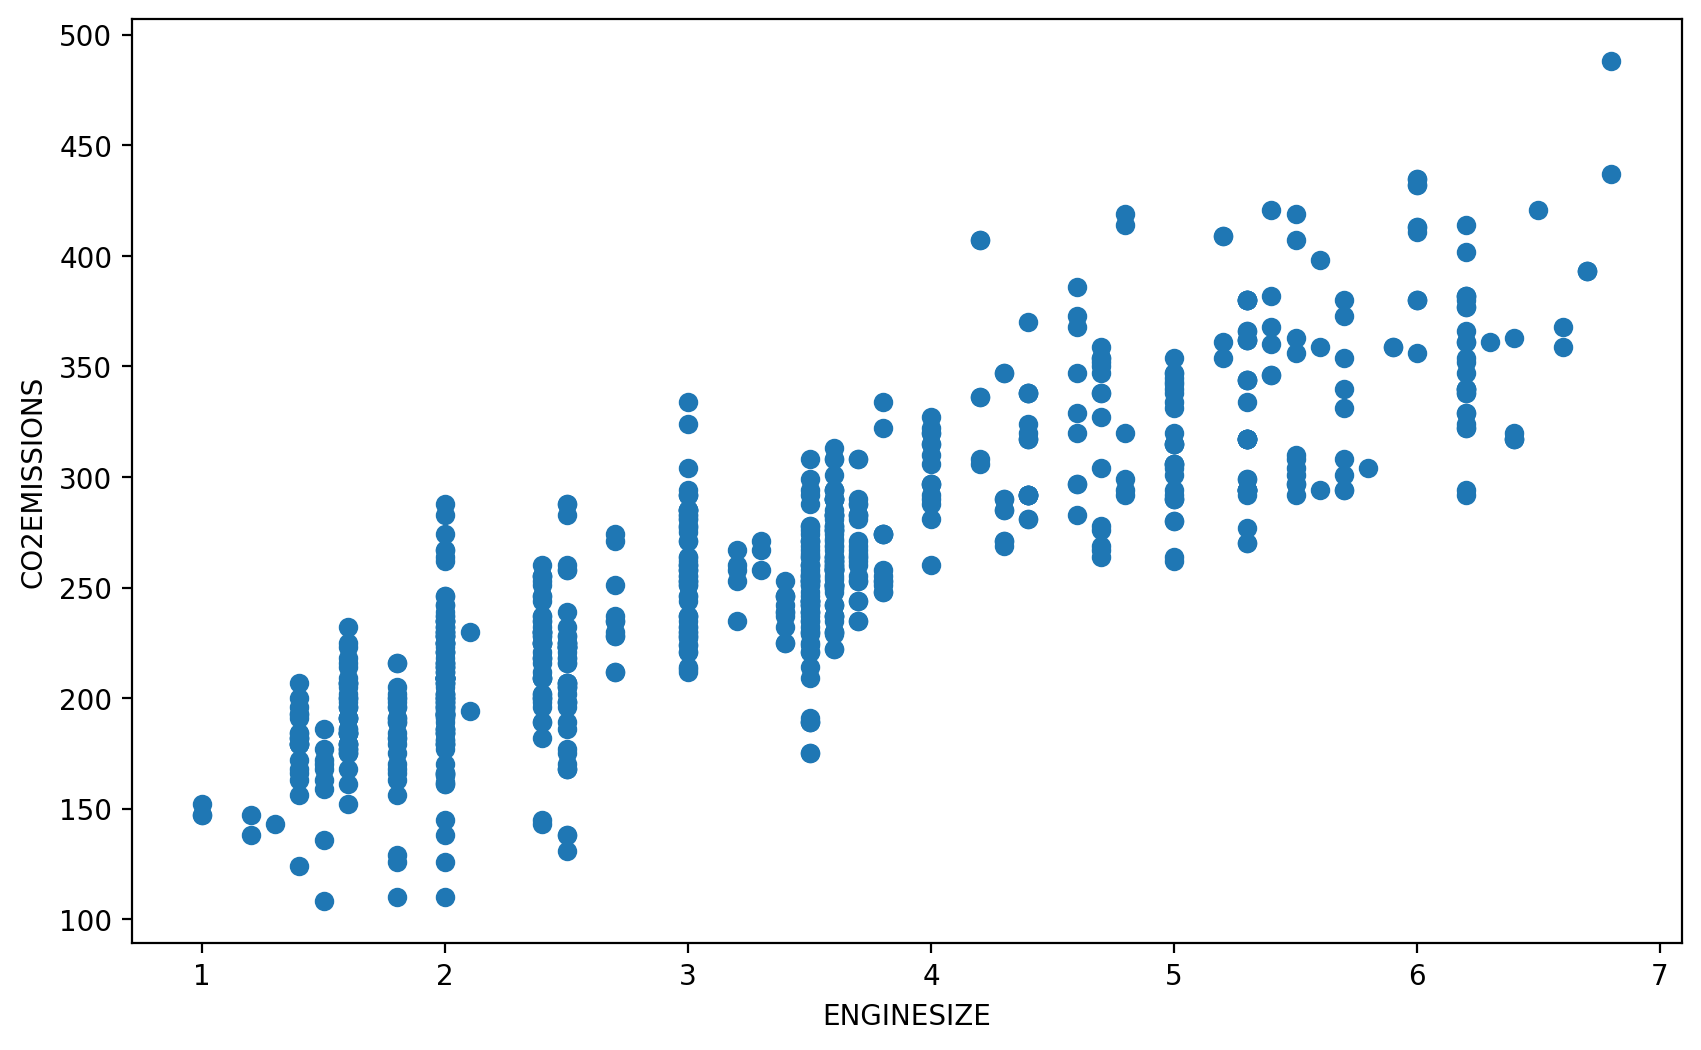

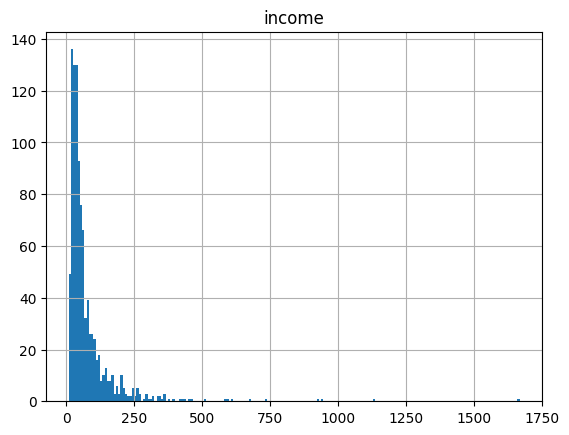

In [34]:
df.hist(column='income', bins=200)

### Feature set

Let's define feature sets, X

In [35]:
df.columns.values.tolist()

['region',
 'tenure',
 'age',
 'marital',
 'address',
 'income',
 'ed',
 'employ',
 'retire',
 'gender',
 'reside',
 'custcat']

To use skicit-learn library, we have to convert the Pandas data frame to Numpy array:

In [36]:
X = df[['region',
 'tenure',
 'age',
 'marital',
 'address',
 'income',
 'ed',
 'employ',
 'retire',
 'gender',
 'reside',
 'custcat']].values
X[0:10]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.,
          1.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.,
          4.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.,
          3.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.,
          1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.,
          3.],
       [  2.,  41.,  39.,   0.,  17.,  78.,   2.,  16.,   0.,   1.,   1.,
          3.],
       [  3.,  45.,  22.,   1.,   2.,  19.,   2.,   4.,   0.,   1.,   5.,
          2.],
       [  2.,  38.,  35.,   0.,   5.,  76.,   2.,  10.,   0.,   0.,   3.,
          4.],
       [  3.,  45.,  59.,   1.,   7., 166.,   4.,  31.,   0.,   0.,   5.,
          3.],
       [  1.,  68.,  41.,   1.,  21.,  72.,   1.,  22.,   0.,   0.,   3.,
          2.]])

What are our labels?

In [37]:
y = df['custcat'].values
y[0:10]

array([1, 4, 3, 1, 3, 3, 2, 4, 3, 2])

## Normalize Data

Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:

In [38]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:10]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004, -1.32797979],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158,  1.35119935],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004,  0.45813963],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794, -1.32797979],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577,  0.45813963],
       [-0.02696767,  0.2564039 , -0.21382135, -0.9900495 ,  0.54048764,
         0.00434618, -

### Train Test Split

Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of our model overfitting.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for the real world problems.

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (800, 12) (800,)
Test set: (200, 12) (200,)


<div id="classification">
    <h2>Classification</h2>
</div>

<h3>K nearest neighbor (KNN)</h3>

#### Import library

Classifier implementing the k-nearest neighbors vote.

In [40]:
from sklearn.neighbors import KNeighborsClassifier

### Training

Let's start the algorithm with k=4 for now:

In [41]:
k = 4

# Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

### Predicting

We can use the model to make predictions on the test set:

In [42]:
yhat = neigh.predict(X_test)
yhat[0:10]

array([3, 1, 1, 2, 4, 3, 3, 1, 3, 4])

### Accuracy evaluation

In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [43]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.82875
Test set Accuracy:  0.735


In [44]:
k = 6
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
yhat = neigh.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8125
Test set Accuracy:  0.755


#### What about other K?

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different values of k.

In [45]:
Ks = 10
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))

for n in range(1, Ks):
    # Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n - 1] = metrics.accuracy_score(y_test, yhat)

    std_acc[n - 1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])

mean_acc

array([0.76 , 0.68 , 0.725, 0.735, 0.73 , 0.755, 0.775, 0.77 , 0.765])

#### Plot the model accuracy for a different number of neighbors.

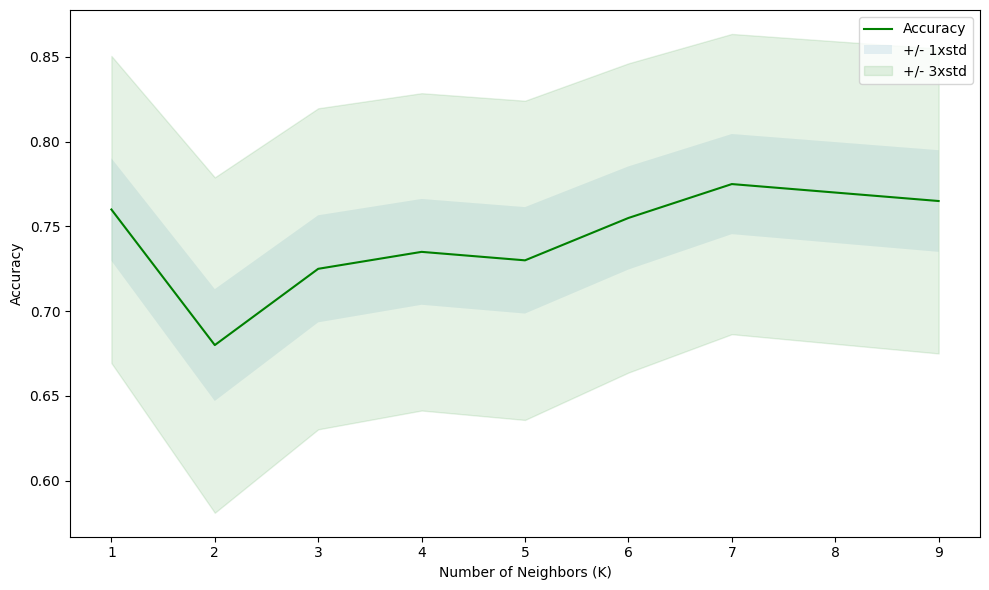

In [46]:
plt.figure(figsize = (10, 6))
plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks),
                 mean_acc - 1 * std_acc,
                 mean_acc + 1 * std_acc,
                 alpha = 0.10)
plt.fill_between(range(1, Ks),
                 mean_acc - 3 * std_acc,
                 mean_acc + 3 * std_acc,
                 alpha = 0.10,
                 color = 'green')
plt.legend(('Accuracy', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [47]:
print('The best accuracy was with', mean_acc.max(), 'with k = ', mean_acc.argmax() + 1)

The best accuracy was with 0.775 with k =  7


<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# Decision Trees


Estimated time needed: **15** minutes
    

## Objectives

After completing this lab you will be able to:

* Develop a classification model using Decision Tree Algorithm

In this lab exercise, you will learn a popular machine learning algorithm, Decision Trees. You will use this classification algorithm to build a model from the historical data of patients, and their response to different medications. Then you will use the trained decision tree to predict the class of an unknown patient, or to find a proper drug for a new patient.

In [48]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import requests
from io import StringIO

<div id="about_dataset">
    <h2>About the dataset</h2>
    Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 
    <br>
    <br>
    Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.
    <br>
    <br>
    It is a sample of multiclass classifier, and you can use the training part of the dataset 
    to build a decision tree, and then use it to predict the class of an unknown patient, or to prescribe a drug to a new patient.
</div>
</p>
<div id="downloading_data"> 
    <h2>Downloading the Data</h2>
    To download the data, we will use !wget to download it from IBM Object Storage.
</div>

In [49]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
my_data = pd.read_csv(StringIO(requests.get(url).text))
my_data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [50]:
my_data.shape

(200, 6)

In [51]:
for col in my_data.columns.values.tolist():
    print(my_data[col].value_counts(), "\n")

Age
47    8
23    7
28    7
49    7
39    6
32    6
50    5
37    5
58    5
60    5
22    5
34    4
72    4
51    4
42    4
26    4
24    4
74    4
67    4
68    4
61    4
56    4
20    4
36    4
45    4
41    4
31    4
43    4
65    4
57    4
53    3
40    3
70    3
59    3
16    3
38    3
15    3
69    3
35    3
18    3
64    3
52    2
55    2
62    2
19    2
29    2
66    2
73    2
46    2
48    2
54    1
17    1
33    1
63    1
30    1
21    1
25    1
Name: count, dtype: int64 

Sex
M    104
F     96
Name: count, dtype: int64 

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64 

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64 

Na_to_K
12.006    2
18.295    2
25.355    1
11.939    1
16.347    1
         ..
24.658    1
24.276    1
13.967    1
19.675    1
11.349    1
Name: count, Length: 198, dtype: int64 

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64 



<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>

Using <b>my_data</b> as the Drug.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector </b> (target) </li>
</ul>

Remove the column containing the target name since it doesn't contain numeric values.


In [52]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

As you may figure out, some features in this dataset are categorical, such as __Sex__ or __BP__. Unfortunately, Sklearn Decision Trees does not handle categorical variables. We can still convert these features to numerical values using __LabelEncoder__
to convert the categorical variable into numerical variables.

In [53]:
from sklearn import preprocessing

le_sex = preprocessing.LabelEncoder()
le_sex.fit(my_data['Sex'].unique())
X[:,1] = le_sex.transform(X[:,1])

le_BP = preprocessing.LabelEncoder()
le_BP.fit(my_data['BP'].unique())
X[:,2] = le_BP.transform(X[:,2])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit(my_data['Cholesterol'])
X[:,3] = le_Chol.transform(X[:,3])

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

Now we can fill the target variable.

In [54]:
y = my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. Let's import <b>train_test_split</b> from <b>sklearn.cross_validation</b>.
</div>

In [55]:
from sklearn.model_selection import train_test_split

Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.

In [56]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

<h3>Practice</h3>
Print the shape of X_trainset and y_trainset. Ensure that the dimensions match.

In [57]:
X_trainset.shape, y_trainset.shape

((140, 5), (140,))

In [58]:
X_testset.shape, y_testset.shape

((60, 5), (60,))

<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>


In [59]:
drugTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=10)

Next we will fit data with the training feature matrix X_trainset and training response vector y_trainset

In [60]:
drugTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>

In [61]:
predTree = drugTree.predict(X_testset)

You can print out predTree and y_testset if you want to cisually compare the predictions to the actual values.

In [62]:
print(predTree[0:5])
print(y_testset[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>

In [63]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTree's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTree's Accuracy:  0.9833333333333333


__Accuracy classification score__ computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

<hr>

<div id="visualization">
    <h2>Visualization</h2>
    
    
Let's visualize the tree
</div>


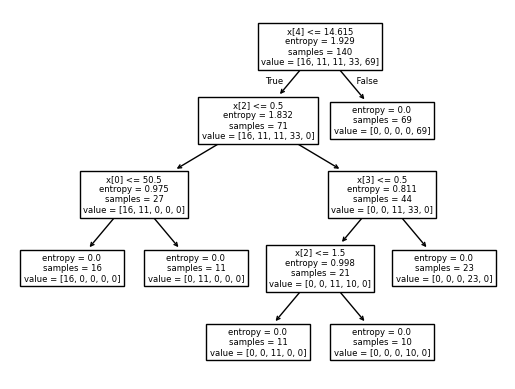

In [64]:
tree.plot_tree(drugTree)
plt.show()

<hr>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

# **Regression Trees**

In this lab you will learn how to implement regression trees using ScikitLearn. We will show what parameters are important, how to train a regression tree, and finally how to determine our regression trees accuracy.


In [65]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import requests
from io import StringIO

Imagine you are a data scientist working for a real estate company that is planning to invest in Boston real estate. You have collected information about various areas of Boston and are tasked with created a model that can predict the median price of houses for that area so it can be used to make offers.

The dataset had information on areas/towns not individual houses, the features are

CRIM: Crime per capita

ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxides concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to ﬁve Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property-tax rate per $10,000

PTRAIO: Pupil-teacher ratio by town

LSTAT: Percent lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

In [66]:
data = pd.read_csv(StringIO(requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/real_estate_data.csv").text))
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,NaN,36.2


In [67]:
data.shape

(506, 13)

In [68]:
# count null values per column
data.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT      20
MEDV        0
dtype: int64

## Data Pre-Processing

First lets drop the rows with missing values because we have enough data in our dataset

In [69]:
data.dropna(inplace=True)

In [70]:
data.shape

(394, 13)

In [71]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

Lets split the dataset into our features and what we are predicting (target)

In [72]:
X = data.drop(columns=['MEDV'])
Y = data['MEDV']

In [73]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21


In [74]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
5    28.7
Name: MEDV, dtype: float64

Finally lets split our data into a training and testing dataset using `train_test_split` from `sklearn.model_selection`

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=1)

## Create Regression Tree

Regression Trees are implemented using `DecisionTreeRegressor` from `sklearn.tree`

The important parameters of `DecisionTreeRegressor` are

`criterion`: {"mse", "friedman_mse", "mae", "poisson"} - The function used to measure error

`max_depth` - The max depth the tree can be

`min_samples_split` - The minimum number of samples required to split a node

`min_samples_leaf` - The minimum number of samples that a leaf can contain

`max_features`: {"auto", "sqrt", "log2"} - The number of feature we examine looking for the best one, used to speed up training

First lets start by creating a `DecisionTreeRegressor` object,  setting the `criterion` parameter to `mse` for  Mean Squared Error

In [76]:
regression_tree = DecisionTreeRegressor(criterion = 'squared_error')

## Training

Now lets train our model using the `fit` method on the `DecisionTreeRegressor` object providing our training data

In [77]:
regression_tree.fit(X_train, Y_train)

DecisionTreeRegressor()

## Evaluation

To evaluate our dataset we will use the `score` method of the `DecisionTreeRegressor` object providing our testing data, this number is the $R^2$ value which indicates the coefficient of determination


In [78]:
regression_tree.score(X_test, Y_test)

0.8438835476079936

We cal also find the average error in our testing set which is the average error in median home value prediction.

In [79]:
prediction = regression_tree.predict(X_test)
print("$", (prediction - Y_test).abs().mean()*1000)

$ 2688.607594936709


## Excercise

Train a regression tree using the `criterion` `mae` then report its $R^2$ value and average error

In [80]:
# regression_tree_1 = DecisionTreeRegressor(criterion = 'mae')
regression_tree_1 = DecisionTreeRegressor(criterion = 'absolute_error')
regression_tree_1.fit(X_train, Y_train)
regression_tree_1.score(X_test, Y_test)
prediction_1 = regression_tree_1.predict(X_test)
print("$", (prediction_1 - Y_test).abs().mean()*1000)

$ 2668.3544303797466


<hr>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# Logistic Regression with Python


Estimated time needed: **25** minutes
    

## Objectives

After completing this lab you will be able to:

* Use scikit Logistic Regression to classify
* Understand confusion matrix


<a id="ref1"></a>
## What is the difference between Linear and Logistic Regression?

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, we need some sort of guidance on what would be the <b>most probable class</b> for that data point. For this, we use <b>Logistic Regression</b>.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Recall linear regression:</strong></font>
<br>
<br>
    As you know, <b>Linear regression</b> finds a function that relates a continuous dependent variable, <b>y</b>, to some predictors (independent variables $x_1$, $x_2$, etc.). For example, simple linear regression assumes a function of the form:
<br><br>
$$
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots
$$
<br>
and finds the values of parameters $\theta_0, \theta_1, \theta_2$, etc, where the term $\theta_0$ is the "intercept". It can be generally shown as:
<br><br>
$$
ℎ_\theta(𝑥) = \theta^TX
$$
<p></p>

</div>

Logistic Regression is a variation of Linear Regression, used when the observed dependent variable, <b>y</b>, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression function and transforming the numeric estimate into a probability with the following function, which is called the sigmoid function 𝜎:

$$
ℎ_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$

In this equation, ${\theta^TX}$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\sigma(\theta^TX)$ is the sigmoid or [logistic function](http://en.wikipedia.org/wiki/Logistic_function), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/mod_ID_24_final.png" width="400" align="center">


The objective of the __Logistic Regression__ algorithm, is to find the best parameters θ, for $ℎ_\theta(𝑥)$ = $\sigma({\theta^TX})$, in such a way that the model best predicts the class of each case.


### Customer churn with Logistic Regression
A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Imagine that you are an analyst at this company and you have to find out who is leaving and why.

In [1]:
!pip install scikit-learn
!pip install matplotlib
!pip install pandas 
!pip install numpy 
%matplotlib inline

In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

<h2 id="about_dataset">About the dataset</h2>
We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 


This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.



The dataset includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

###  Load the Telco Churn data 
Telco Churn is a hypothetical data file that concerns a telecommunications company's efforts to reduce turnover in its customer base. Each case corresponds to a separate customer and it records various demographic and service usage information. Before you can work with the data, you must use the URL to get the ChurnData.csv.

In [3]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv'

In [11]:
import requests
from io import StringIO
churn_df = pd.read_csv(StringIO(requests.get(url).text))
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [16]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless','churn']]
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [17]:
churn_df['churn'] =  churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


Let's define X and y for our dataset.

In [19]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [20]:
y = np.asarray(churn_df['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

Normalize the dataset

In [23]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

### Train/Test dataset

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (160, 7) (160,)
Test set:  (40, 7) (40,)


<h2 id="modeling">Modeling (Logistic Regression with Scikit-learn)</h2>

Let's build our model using __LogisticRegression__ from the Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in the internet.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem of machine learning models.
__C__ parameter indicates __inverse of regularization strength__ which must be a positive float. Smaller values specify stronger regularization. 
Now let's fit our model with train set:


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

Now we can predict using our test set:

In [27]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

In [29]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

<h2 id="evaluation">Evaluation</h2>

### jaccard index
Let's try the jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [30]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.7058823529411765

### confusion matrix
Another way of looking at the accuracy of the classifier is to look at __confusion matrix__.

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    tresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color='white' if cm[i, j] > tresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1, 0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


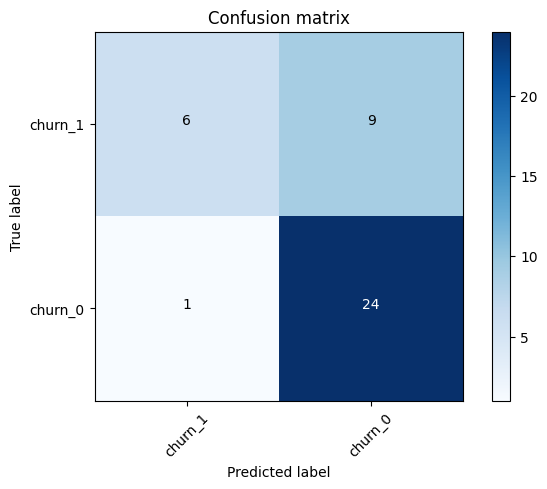

In [38]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1, 0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn_1', 'churn_0'], normalize=False, title='Confusion matrix')

In [39]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



Based on the count of each section, we can calculate precision and recall of each label:


- __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- __Recall__ is the true positive rate. It is defined as: Recall =  TP / (TP + FN)

    
So, we can calculate the precision and recall of each class.

__F1 score:__
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.


Finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case.

### log loss
Now, let's try __log loss__ for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. 

In [40]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6017092478101185

<h2 id="practice">Practice</h2>
Try to build Logistic Regression model again for the same dataset, but this time, use different __solver__ and __regularization__ values? What is new __logLoss__ value?

In [42]:
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train, y_train)
yhat_prob2 = LR2.predict_proba(X_test)
print('Logloss: %.2f'% log_loss(y_test, yhat_prob2))

Logloss: 0.61


<hr>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


#  SVM (Support Vector Machines)


Estimated time needed: **15** minutes
    

## Objectives

After completing this lab you will be able to:

* Use scikit-learn to Support Vector Machine to classify

In this notebook, you will use SVM (Support Vector Machines) to build and train a model using human cell records, and classify cells to whether the samples are benign or malignant.

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

In [43]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

<h2 id="load_dataset">Load the Cancer data</h2>
The example is based on a dataset that is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepository.html]. The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:

|Field name|Description|
|--- |--- |
|ID|Clump thickness|
|Clump|Clump thickness|
|UnifSize|Uniformity of cell size|
|UnifShape|Uniformity of cell shape|
|MargAdh|Marginal adhesion|
|SingEpiSize|Single epithelial cell size|
|BareNuc|Bare nuclei|
|BlandChrom|Bland chromatin|
|NormNucl|Normal nucleoli|
|Mit|Mitoses|
|Class|Benign or malignant|

In [44]:
cell_df = pd.read_csv(StringIO(requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv').text))
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


The ID field contains the patient identifiers. The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.

The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

Let's look at the distribution of the classes based on Clump thickness and Uniformity of cell size:

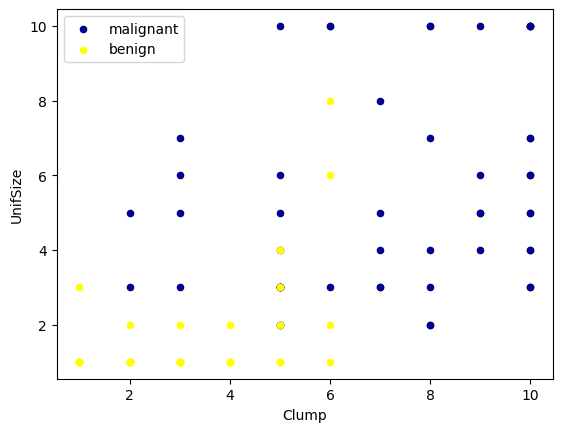

In [45]:
ax = cell_df[cell_df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
cell_df[cell_df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);
plt.show()

## Data pre-processing and selection

Let's first look at columns data types:

In [47]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

It looks like the __BareNuc__ column includes some values that are not numerical. We can drop those rows:

In [48]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

/var/folders/78/dbwvgbzn7s10jfqb_7m1rdcm0000gn/T/ipykernel_903/1178285181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [49]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]])

In [51]:
y = np.asarray(cell_df['Class'])
y [0:5]

array([2, 2, 2, 2, 2])

## Train/Test dataset

We split our dataset into train and test set:

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


<h2 id="modeling">Modeling (SVM with Scikit-learn)</h2>

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

    1.Linear
    2.Polynomial
    3.Radial basis function (RBF)
    4.Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset. We usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.

In [53]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

After being fitted, the model can then be used to predict new values:

In [54]:
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 4, 2, 4, 2])

<h2 id="evaluation">Evaluation</h2>

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [56]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


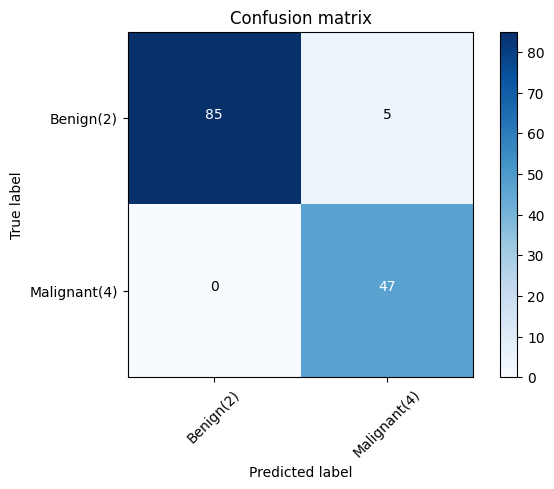

In [57]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

You can also easily use the __f1_score__ from sklearn library:

In [58]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.9639038982104676

Let's try the jaccard index for accuracy:

In [59]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=2)

0.9444444444444444

<h2 id="practice">Practice</h2>
Can you rebuild the model, but this time with a __linear__ kernel? You can use __kernel='linear'__ option, when you define the svm. How the accuracy changes with the new kernel function?


In [60]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train)
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2,pos_label=2))

Avg F1-score: 0.9639
Jaccard score: 0.9444


<hr>

#  **Softmax Regression, One-vs-All and One-vs-One for Multi-class Classification**

 In this lab, we will study how to convert a linear classifier into a multi-class classifier, including multinomial logistic regression or softmax regression, One vs. All (One-vs-Rest) and One vs. One.

*   Understand and apply some theory behind:
    *  Softmax regression
    *  One vs. All (One-vs-Rest)
    * One vs. One

In Multi-class classification, we classify data into multiple class labels. Unlike classification trees and k-nearest neighbor, the concept of multi-class classification for linear classifiers is not as straightforward. We can convert logistic regression to multi-class classification using multinomial logistic regression or softmax regression; this is a generalization of logistic regression, this will not work for support vector machines. One vs. All (One-vs-Rest) and One vs. One are two other multi-class classification techniques can convert any two-class classifier into a multi-class classifier.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

## Utility Function

This function plots a different decision boundary.

In [2]:
plot_colors = "ryb"
plot_step = 0.02

def decision_boundary (X,y,model,iris, two=None):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z,cmap=plt.cm.RdYlBu)
    
    if two:
        cs = plt.contourf(xx, yy, Z,cmap=plt.cm.RdYlBu)
        for i, color in zip(np.unique(y), plot_colors):
            
            idx = np.where( y== i)
            plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, s=15)
        plt.show()
  
    else:
        set_={0,1,2}
        print(set_)
        for i, color in zip(range(3), plot_colors):
            idx = np.where( y== i)
            if np.any(idx):

                set_.remove(i)

                plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


        for  i in set_:
            idx = np.where( iris.target== i)
            plt.scatter(X[idx, 0], X[idx, 1], marker='x',color='black')

        plt.show()


This function will plot the probability of belonging to each class; each column is the probability of belonging to a class and the row number is the sample number.

In [4]:
def plot_probability_array(X,probability_array):

    plot_array=np.zeros((X.shape[0],30))
    col_start=0
    ones=np.ones((X.shape[0],30))
    for class_,col_end in enumerate([10,20,30]):
        plot_array[:,col_start:col_end]= np.repeat(probability_array[:,class_].reshape(-1,1), 10,axis=1)
        col_start=col_end
    plt.imshow(plot_array)
    plt.xticks([])
    plt.ylabel("samples")
    plt.xlabel("probability of 3 classes")
    plt.colorbar()
    plt.show()

In ths lab we will use the  iris dataset,  it consists of three different types of irises’ (Setosa y=0, Versicolour y=1, and Virginica y=2), petal and sepal length, stored in a 150x4 numpy.ndarray.

The rows being the samples and the columns: Sepal Length, Sepal Width, Petal Length and Petal Width.

The following plot uses the second two features:

In [5]:
pair=[1, 3]
iris = datasets.load_iris()
X = iris.data[:, pair]
y = iris.target
np.unique(y)

array([0, 1, 2])

Text(0, 0.5, 'petal width')

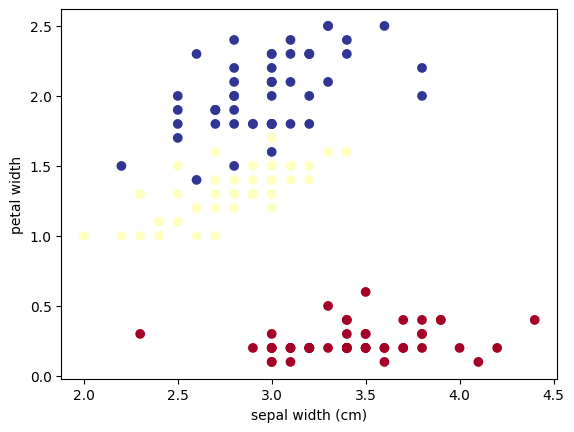

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel("sepal width (cm)")
plt.ylabel("petal width")

## **Softmax Regression**  

SoftMax regression is similar to logistic regression, and the softmax function converts the actual distances, that is, dot products of $x$ with each of the parameters $\theta_i$ for the $K$ classes. This is converted to probabilities using the following:

$softmax(x,i) = \frac{e^{ \theta_i^T \bf x}}{\sum_{j=1}^K e^{\theta_j^T x}} $

The training procedure is almost identical to logistic regression. Consider the three-class example where $y \in \{0,1,2\}$ we would like to classify $x_1$. We can use the softmax function to generate a probability of how likely the sample belongs to each class:

$[softmax(x_1,0),softmax(x_1,1),softmax(x_1,2)]=[0.97,0.2,0.1]$

The index of each probability is the same as the class. We can make a prediction using the argmax function:

$\hat{y}=argmax_i  \{softmax(x,i)\}$

For the previous example, we can make a prediction as follows:

$\hat{y}=argmax_i  \{[0.97,0.2,0.1]\}=0$

The <code>sklearn</code> does this automatically, but we can verify the prediction step, as we fit the model:

In [8]:
lr = LogisticRegression(random_state=0).fit(X, y)

We generate the probability using the method <ocde>predict_proba</code>:

In [9]:
probability=lr.predict_proba(X)

We can plot the probability of belonging to each class; each column is the probability of belonging to a class and the row number is the sample number.

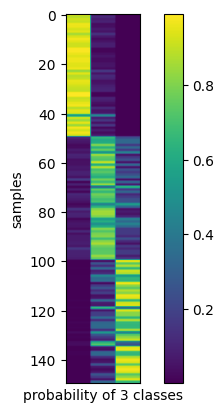

In [10]:
plot_probability_array(X,probability)

Here, is the output for the first sample:

In [11]:
probability[0,:]

array([9.57579132e-01, 4.23242810e-02, 9.65866230e-05])

We see it sums to one.

In [12]:
probability[0,:].sum()

0.9999999999999999

We can apply the $argmax$ function.

In [13]:
np.argmax(probability[0,:])

0

We can apply the $argmax$ function to each sample.

In [14]:
softmax_prediction=np.argmax(probability,axis=1)
softmax_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We can verify that sklearn does this under the hood by comparing it to the output of the method <code> predict  </code>.

In [15]:
yhat =lr.predict(X)
accuracy_score(yhat,softmax_prediction)

1.0

We can't use Softmax regression for SVMs, Let's explore two methods of Multi-class Classification that we can apply to SVM.

## SVM 

Sklean performs Multi-class Classification automatically, we can apply the method and calculate the accuracy. Train a SVM classifier with the `kernel` set to `linear`, `gamma` set to `0.5`, and the `probability` paramter set to `True`, then train the model using the `X` and `y` data.

In [16]:
model = SVC(kernel='linear', gamma=.5, probability=True)

model.fit(X,y)

SVC(gamma=0.5, kernel='linear', probability=True)

Find the `accuracy_score` on the training data.

In [17]:
yhat = model.predict(X)

accuracy_score(y,yhat)

0.96

We can plot the decision_boundary.

{0, 1, 2}


/var/folders/78/dbwvgbzn7s10jfqb_7m1rdcm0000gn/T/ipykernel_12872/2671635951.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


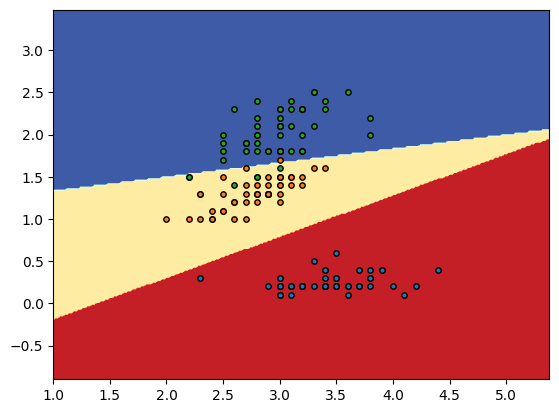

In [19]:
decision_boundary(X,y,model,iris)

Let's implement One vs. All and One vs One:

## One vs. All (One-vs-Rest) 

For one-vs-all classification, if we have K classes, we use K two-class classifier models. The number of class labels present in the dataset is equal to the number of generated classifiers. First, we create an artificial class we will call this "dummy" class. For each classifier, we split the data into two classes. We take the class samples we would like to classify, the rest of the samples will be labelled as a dummy class. We repeat the process for each class. To make a  classification, we use the classifier with the highest probability, disregarding the dummy class.

### Train Each Classifier

Here, we train three classifiers and place them in the list <code>my_models</code>. For each class we take the class samples we would like to classify, and the rest will be labelled as a dummy class. We repeat the process for each class. For each classifier, we plot the decision regions. The class we are interested in is in red, and the dummy class is in blue. Similarly, the class samples are marked in blue, and the dummy samples are marked with a black x.

{0, 1, 2}


/var/folders/78/dbwvgbzn7s10jfqb_7m1rdcm0000gn/T/ipykernel_12872/2671635951.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


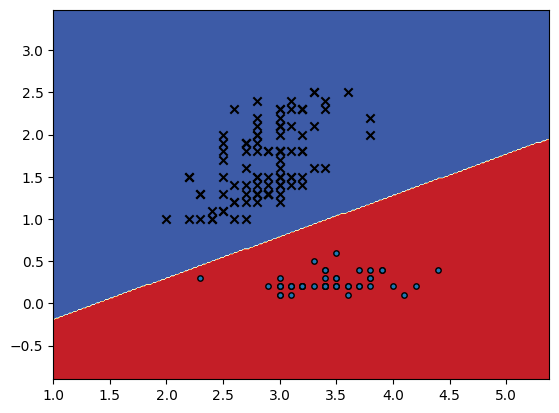

{0, 1, 2}


/var/folders/78/dbwvgbzn7s10jfqb_7m1rdcm0000gn/T/ipykernel_12872/2671635951.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


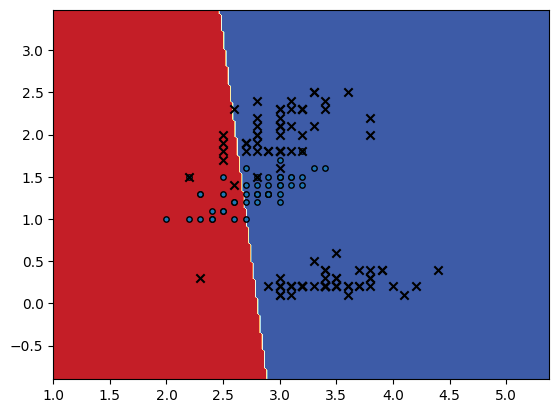

{0, 1, 2}


/var/folders/78/dbwvgbzn7s10jfqb_7m1rdcm0000gn/T/ipykernel_12872/2671635951.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


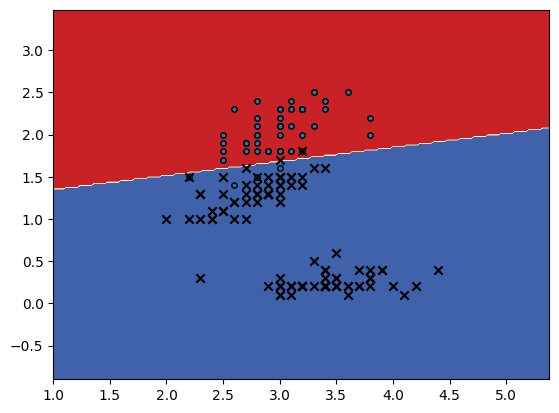

In [20]:
#dummy class
dummy_class=y.max()+1
#list used for classifiers 
my_models=[]
#iterate through each class
for class_ in np.unique(y):
    #select the index of our  class
    select=(y==class_)
    temp_y=np.zeros(y.shape)
    #class, we are trying to classify 
    temp_y[y==class_]=class_
    #set other samples  to a dummy class 
    temp_y[y!=class_]=dummy_class
    #Train model and add to list 
    model=SVC(kernel='linear', gamma=.5, probability=True)    
    my_models.append(model.fit(X,temp_y))
    #plot decision boundary 
    decision_boundary (X,temp_y,model,iris)

 For each sample we calculate the  probability of belonging to each class, not including the dummy class.

In [21]:
probability_array=np.zeros((X.shape[0],3))
for j,model in enumerate(my_models):

    real_class=np.where(np.array(model.classes_)!=3)[0]

    probability_array[:,j]=model.predict_proba(X)[:,real_class][:,0]

Here, is the probability of belonging to each class for the first sample.

In [22]:
probability_array[0,:]

array([9.91357476e-01, 1.24577084e-01, 1.05651225e-11])

As each is the probability of belonging to the actual class and not the dummy class, it does not sum to one. 

In [23]:
probability_array[0,:].sum()

1.1159345602511963

We can plot the probability of belonging to the class. The row number is the sample number.

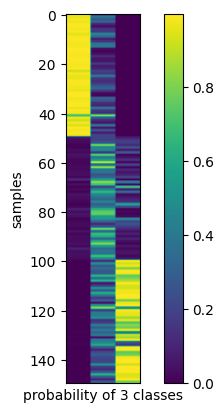

In [25]:
plot_probability_array(X,probability_array)

We can apply the $argmax$ function to each sample to find the class.

In [26]:
one_vs_all=np.argmax(probability_array,axis=1)
one_vs_all

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We can calculate the accuracy. 

In [27]:
accuracy_score(y,one_vs_all)

0.9466666666666667

We see the accuracy is less than the one obtained by sklearn, and this is because for SVM, sklearn uses one vs one; let's verify it by comparing the outputs.

## One vs One 


In One-vs-One classification, we split up the data into each class, and then train a two-class classifier on each pair of classes. For example, if we have class 0,1,2, we would train one classifier on the samples that are class 0 and class 1, a second classifier on samples that are of class 0 and class 2, and a final classifier on samples of class 1 and class 2.

For $K$ classes, we have to train $K(K-1)/2$ classifiers. So, if $K=3$, we have $(3x2)/2=3 $classes.

To perform classification on a sample, we perform a majority vote and select the class with the most predictions.

Here, we list each class.

In [28]:
classes_=set(np.unique(y))
classes_

{0, 1, 2}

Determine the number of classifiers:

In [29]:
K=len(classes_)
K*(K-1)/2

3.0

We then train a two-class classifier on each pair of classes. We plot the different training points for each of the two classes. 

class 0 vs class 1 


/var/folders/78/dbwvgbzn7s10jfqb_7m1rdcm0000gn/T/ipykernel_12872/2671635951.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, s=15)


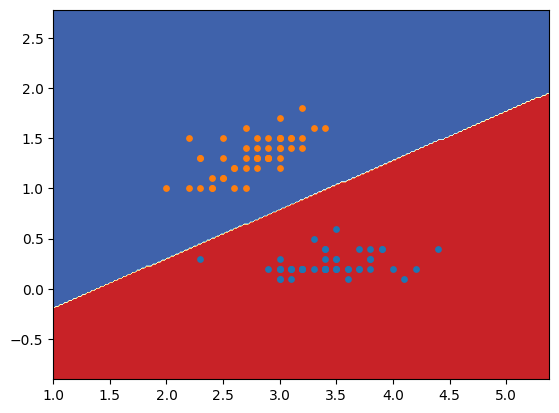

class 0 vs class 2 


/var/folders/78/dbwvgbzn7s10jfqb_7m1rdcm0000gn/T/ipykernel_12872/2671635951.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, s=15)


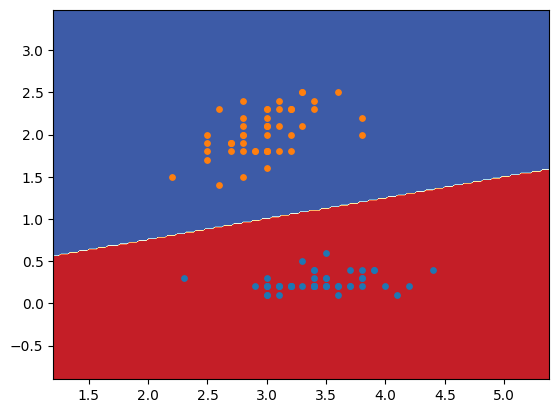

class 1 vs class 2 


/var/folders/78/dbwvgbzn7s10jfqb_7m1rdcm0000gn/T/ipykernel_12872/2671635951.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, s=15)


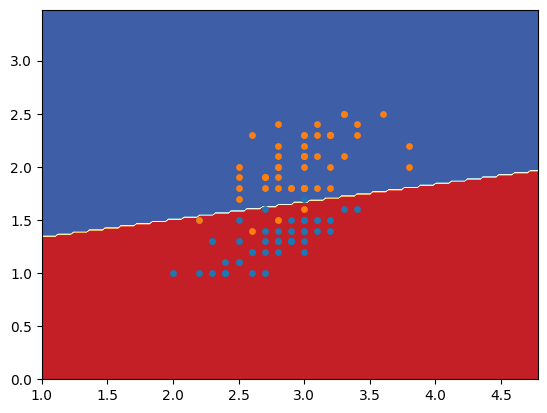

In [30]:
pairs=[]
left_overs=classes_.copy()
#list used for classifiers 
my_models=[]
#iterate through each class
for class_ in classes_:
    #remove class we have seen before 
    left_overs.remove(class_)
    #the second class in the pair
    for second_class in left_overs:
        pairs.append(str(class_)+' and '+str(second_class))
        print("class {} vs class {} ".format(class_,second_class) )
        temp_y=np.zeros(y.shape)
        #find classes in pair 
        select=np.logical_or(y==class_ , y==second_class)
        #train model 
        model=SVC(kernel='linear', gamma=.5, probability=True)  
        model.fit(X[select,:],y[select])
        my_models.append(model)
        #Plot decision boundary for each pair and corresponding Training samples. 
        decision_boundary (X[select,:],y[select],model,iris,two=True)

In [31]:
pairs

['0 and 1', '0 and 2', '1 and 2']

As we can see, our data is left-skewed, containing more "5" star reviews. 

Here, we are plotting the distribution of text length.


In [32]:
pairs
majority_vote_array=np.zeros((X.shape[0],3))
majority_vote_dict={}
for j,(model,pair) in enumerate(zip(my_models,pairs)):

    majority_vote_dict[pair]=model.predict(X)
    majority_vote_array[:,j]=model.predict(X)

In the following table, each column is the output of a classifier for each pair of classes and the output is the prediction:

In [33]:
pd.DataFrame(majority_vote_dict).head(10)

,0 and 1,0 and 2,1 and 2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


To perform classification on a sample, we perform a majority vote, that is, select the class with the most predictions. We repeat the process for each sample. 

In [34]:
one_vs_one=np.array([np.bincount(sample.astype(int)).argmax() for sample  in majority_vote_array]) 
one_vs_one

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We calculate the accuracy:

In [35]:
accuracy_score(y,one_vs_one)

0.96

If we compare it to `sklearn`, it's the same! 

In [36]:
accuracy_score(yhat,one_vs_one)

1.0

<hr>


<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# K-Means Clustering


Estimated time needed: **25** minutes
    

## Objectives

After completing this lab you will be able to:

* Use scikit-learn's K-Means Clustering to cluster data

## Introduction

There are many models for **clustering** out there. In this notebook, we will be presenting the model that is considered one of the simplest models amongst them. Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, it is especially useful if you need to quickly discover insights from **unlabeled data**. In this notebook, you will learn how to use k-Means for customer segmentation.

Some real-world applications of k-means:
- Customer segmentation
- Understand what the visitors of a website are trying to accomplish
- Pattern recognition
- Machine learning
- Data compression


In this notebook we practice k-means clustering with 2 examples:
- k-means on a random generated dataset
- Using k-means for customer segmentation

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

<h1 id="random_generated_dataset">k-Means on a randomly generated dataset</h1>

Let's create our own dataset for this lab!

First we need to set a random seed. Use <b>numpy's random.seed()</b> function, where the seed will be set to <b>0</b>.

In [2]:
np.random.seed(0)

Next we will be making <i> random clusters </i> of points by using the <b> make_blobs </b> class. The <b> make_blobs </b> class can take in many inputs, but we will be using these specific ones. <br> <br>
<b> <u> Input </u> </b>
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 5000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul> 
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>

In [12]:
X, y = make_blobs(n_samples=5000, centers=[[4, 4], [-2, -1], [1, 1], [-2, 4]], cluster_std=0.95)

In [17]:
X[0:10], y[0:10]

(array([[-0.92883216, -0.163549  ],
        [ 3.84438949,  3.9097096 ],
        [-2.40016684,  3.75448839],
        [ 4.20286248,  3.78510014],
        [ 1.00948285,  0.63205777],
        [ 1.52783885,  2.13786812],
        [-2.43184503,  4.32944271],
        [-0.47150496,  3.2088454 ],
        [ 1.43261363,  1.51899501],
        [ 2.52477821,  2.94671022]]),
 array([1, 0, 3, 0, 2, 2, 3, 3, 2, 0]))

Display the scatter plot of the randomly generated data.

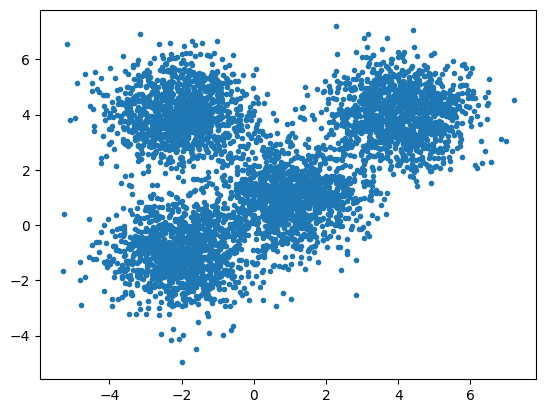

In [13]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

<h2 id="setting_up_K_means">Setting up K-Means</h2>
Now that we have our random data, let's set up our K-Means Clustering.

The KMeans class has many parameters that can be used, but we will be using these three:
<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.

In [14]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

Now let's fit the KMeans model with the feature matrix we created above, <b> X </b>.

In [15]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

Now let's grab the labels for each point in the model using KMeans' <b> .labels\_ </b> attribute and save it as <b> k_means_labels </b>.

In [18]:
k_means_labels = k_means.labels_
k_means_labels

array([3, 1, 2, ..., 0, 0, 2], dtype=int32)

We will also get the coordinates of the cluster centers using KMeans' <b> .cluster&#95;centers&#95; </b> and save it as <b> k_means_cluster_centers </b>.

In [19]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 1.04359197,  0.97160907],
       [ 4.03267995,  4.02579167],
       [-2.04300094,  4.03051708],
       [-2.00296648, -1.04692303]])

<h2 id="creating_visual_plot">Creating the Visual Plot</h2>

So now that we have the random data generated and the KMeans model initialized, let's plot them and see what it looks like!

Please read through the code and comments to understand how to plot the model.

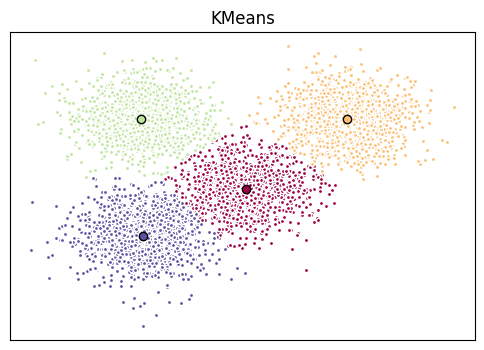

In [21]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()